In [8]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cPickle
%matplotlib inline

In [9]:
pd.set_option('display.max_columns', 500)

In [31]:
activity =[]
basket_amount =[]
bonus_credit_eligibility =[]
gender = []
num_borrowers = []
has_picture = []
description_lang = []
description = []
funded_amount = []
funded_date =[]
bulkEntries = []
entries = []
lender_count= []
country_code =[]
town = []
geo_level =[]
partner_id = []
sector =[]
status= []
tags = []
len_teg=[]
video = []
repayment_term= []
repayment_interval =[]
use = []
theme= []
lat =[]
lit = []
country_name = []

In [11]:
#topic model
#common word and key words 

In [32]:
for i in range(1, 1638):
    with open("/home/patanjalichanakya/Documents/Galvanize/find_defaulter/data/loans/%s.json" %i) as f:
        file_ = f.read()
    file_json = json.loads(file_)["loans"]
    for j in range(len(file_json)):
        repayment_interval.append(file_json[j]["terms"]["repayment_interval"])
        repayment_term.append(file_json[j]["terms"]["repayment_term"])
        activity.append(file_json[j]["activity"])
        basket_amount.append(file_json[j]["basket_amount"])
        bonus_credit_eligibility.append(file_json[j]["bonus_credit_eligibility"])
        num_borrowers.append(len(file_json[j]["borrowers"]))
        gender.append([str(x["gender"]) for x in file_json[j]["borrowers"]])
        has_picture.append([x["pictured"] for x in file_json[j]["borrowers"]])
        description_lang.append(len(file_json[j]["description"]["languages"]))
        description.append( file_json[j]["description"]["texts"]["en"]\
                           if 'en' in file_json[j]["description"]['languages'] else None)
        funded_amount.append( file_json[j]["funded_amount"])
        funded_date.append(str(file_json[j]["funded_date"]))
        bulkEntries.append(file_json[j]["journal_totals"]["bulkEntries"])
        entries.append(file_json[j]["journal_totals"]["entries"])
        lender_count.append(file_json[j]["lender_count"])
        country_code.append(file_json[j]["location"]["country_code"])
        geo_level.append(file_json[j]["location"]["geo"]["level"])
        town.append(file_json[j]["location"]["town"])
        partner_id.append(file_json[j]["partner_id"])
        sector.append(file_json[j]["sector"])
        status.append(file_json[j]["status"])
        tags.append(file_json[j]["tags"])
        len_teg.append(len(file_json[j]["tags"]))
        video.append(file_json[j]["video"])
        use.append(file_json[j]["use"])
        theme.append(file_json[j]["theme"])
        lat.append([float(i) for i in str(file_json[j]["location"]["geo"]["pairs"]).split()][0])
        lit.append([float(i) for i in str(file_json[j]["location"]["geo"]["pairs"]).split()][1])
        country_name.append(file_json[j]['location']['country'])

In [33]:
dict_={"activity":activity, "basket_amount":basket_amount, "bonus_credit_eligibility":bonus_credit_eligibility,\
"gender":gender, "num_borrowers":num_borrowers,"has_picture":has_picture, "description_lang":description_lang,\
"description":description, "funded_amount":funded_amount, "funded_date":funded_date, "bulkEntries":bulkEntries,\
"entries":entries, "lender_count":lender_count, "country_code":country_code, "town":town, "geo_level":geo_level,\
"partner_id":partner_id, "sector":sector, "status":status, "tags":tags, "len_teg":len_teg, "video":video,\
"repayment_term":repayment_term, "repayment_interval":repayment_interval, "use":use, "theme":theme, "lat":lat, "long":lit,\
"country_name": country_name}

In [34]:
df = pd.DataFrame(dict_)
len(repayment_interval)

818138

In [94]:
for i in df.columns:
    try:
        print len(df[i].unique()), i
    except:
        print type(df[i][0]), i


149 activity
9 basket_amount
2 bonus_credit_eligibility
1 bulkEntries
90 country_code
752141 description
2 description_lang
23 entries
469 funded_amount
675937 funded_date
<type 'list'> gender
2 geo_level
<type 'list'> has_picture
760 lat
14 len_teg
444 lender_count
812 long
50 num_borrowers
376 partner_id
4 repayment_interval
130 repayment_term
15 sector
13 status
<type 'list'> tags
22 theme
16261 town
558428 use
<type 'NoneType'> video


In [7]:
del df["tags"]
del df["bonus_credit_eligibility"]
del df["use"]
del df["video"]

In [8]:
def find_male(x):
    temp_m = 0
    for j in range(len(x)):
        if x[j] == "M":
            temp_m +=1
    return temp_m
def find_female(x):
    temp_f = 0
    for j in range(len(x)):
        if x[j] == "F":
            temp_f +=1
    return temp_f

df["num_male"] = df.gender.apply(lambda x: find_male(x))
df["num_female"] = df.gender.apply(lambda x: find_female(x))
df["male_ratio"] = df.num_male/df.num_borrowers

del df["gender"]


In [9]:
def change_picture(x):
    number_picture = 0
    for j in range(len(x)):
       
        if x[j]== True:
            number_picture +=1
    return number_picture
df["number_of_picture"] = df.has_picture.apply(lambda x: change_picture(x))
df["ratio_of_picture"] = df["number_of_picture"]/df.num_borrowers

del df["has_picture"]

In [10]:
del df["number_of_picture"]

In [113]:
df.describe()

,activity,basket_amount,country_code,description_lang,entries,funded_amount,geo_level,lat,len_teg,lender_count,long,num_borrowers,partner_id,repayment_interval,repayment_term,sector,status,theme,town,num_male,num_female,male_ratio,ratio_of_picture,paid,defaulted
count,818138.000000,818138.000000,818138.000000,818138.000000,818138.000000,818138.000000,818138.000000,818138.000000,818138.000000,818138.000000,818138.000000,818138.000000,818138.000000,818138.000000,818138.000000,818138.000000,818138.000000,818138.000000,818138.000000,818138.000000,818138.000000,818138.000000,818138.000000,818138.000000,818138.000000
mean,44.454260,-1.980376,28.179357,1.336176,0.590997,791.109416,0.695548,9.659831,0.431394,23.879715,17.982329,1.961296,121.735871,1.525305,12.744392,3.544996,1.544579,0.918524,3537.621305,0.386376,1.574920,0.259696,0.997634,0.755418,0.021199
std,41.685779,0.545407,18.901801,0.472400,0.764001,908.268931,0.460175,15.588806,1.115080,26.583860,78.886246,3.329764,60.953161,0.835871,7.403481,3.553519,2.916846,2.830498,3904.841858,0.967413,3.051795,0.429863,0.017876,0.429839,0.144048
min,0.000000,-2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-30.000000,0.000000,0.000000,-172.616667,1.000000,1.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.777778,0.000000,0.000000
25%,14.000000,-2.000000,9.000000,1.000000,0.000000,300.000000,0.000000,0.616667,0.000000,9.000000,-72.000000,1.000000,78.000000,1.000000,8.000000,1.000000,0.000000,0.000000,479.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
50%,28.000000,-2.000000,33.000000,1.000000,0.000000,525.000000,1.000000,12.435556,0.000000,17.000000,33.000000,1.000000,123.000000,1.000000,12.000000,2.000000,0.000000,0.000000,1642.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,70.000000,-2.000000,48.000000,2.000000,1.000000,1000.000000,1.000000,13.833333,0.000000,29.000000,104.916667,1.000000,148.000000,2.000000,14.000000,6.000000,0.000000,0.000000,6184.000000,1.000000,1.000000,0.666667,1.000000,1.000000,0.000000
max,148.000000,200.000000,89.000000,2.000000,24.000000,100000.000000,1.000000,50.000000,13.000000,2986.000000,167.000000,50.000000,444.000000,3.000000,195.000000,14.000000,12.000000,21.000000,16260.000000,44.000000,50.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
del df["bulkEntries"]

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 818138 entries, 0 to 818137
Data columns (total 25 columns):
activity              818138 non-null object
basket_amount         6540 non-null float64
country_code          818138 non-null object
description           793001 non-null object
description_lang      818138 non-null int64
entries               818138 non-null int64
funded_amount         818138 non-null int64
funded_date           818138 non-null object
geo_level             818138 non-null object
lat                   818138 non-null float64
len_teg               818138 non-null int64
lender_count          818138 non-null int64
long                  818138 non-null float64
num_borrowers         818138 non-null int64
partner_id            818138 non-null int64
repayment_interval    816323 non-null object
repayment_term        815972 non-null float64
sector                818138 non-null object
status                818138 non-null object
theme                 137614 non-null o

In [12]:
country_code_dict={}
for i, j in enumerate(df.country_code.unique()):
    country_code_dict[j] = i
    
def change_country_code(x):
    if x in country_code_dict:
        return country_code_dict[x]
    else:
        return -2
df.country_code = df.country_code.apply(lambda x : change_country_code(x))

In [13]:
town_dict={}
for i, j in enumerate(df.town.unique()):
    town_dict[j] = i
    
def change_country_code(x):
    if x in town_dict:
        return town_dict[x]
    else:
        return -2
df.town = df.town.apply(lambda x : change_country_code(x))

In [14]:
df.basket_amount = df.basket_amount.fillna(-2)

In [15]:
sector_dict={}
for i, j in enumerate(df.sector.unique()):
    sector_dict[j] = i
    
def change_sector(x):
    if x in sector_dict:
        return sector_dict[x]
    else:
        return -2
df.sector = df.sector.apply(lambda x : change_sector(x))

In [16]:
df.repayment_term =df.repayment_term.fillna(-2)

In [17]:
theme_dict={}
for i, j in enumerate(df.theme.unique()):
    theme_dict[j] = i
    
def change_theme(x):
    if x in theme_dict:
        return theme_dict[x]
    else:
        return -2
df.theme = df.theme.apply(lambda x : change_theme(x))

In [18]:
geo_level_dict={}
for i, j in enumerate(df.geo_level.unique()):
    geo_level_dict[j] = i
    
def change_geo_level(x):
    if x in geo_level_dict:
        return geo_level_dict[x]
    else:
        return -2
df.geo_level = df.geo_level.apply(lambda x : change_geo_level(x))

In [19]:
activity_dict={}
for i, j in enumerate(df.activity.unique()):
    activity_dict[j] = i
    
def chage_activity(x):
    if x in activity_dict:
        return activity_dict[x]
    else:
        return -2
df.activity = df.activity.apply(lambda x : chage_activity(x))

In [20]:
def change_status_paid(x):
    if x=='paid':
        return 1
    else:
        return 0
    
def  change_status_default(x):
    if x== "defaulted":
        return 1
    else:
        return 0

df["paid"] = df.status.apply(lambda x: change_status_paid(x))
df["defaulted"] = df.status.apply(lambda x: change_status_default(x))

In [21]:
repayment_interval_dict = {}

for i, j in enumerate(df.repayment_interval.unique()):
    repayment_interval_dict[j] = i 
    
def change_repayment_interval(x):
    
    if x in repayment_interval_dict:
        return repayment_interval_dict[x]
    else:
        return -2
    
df.repayment_interval = df.repayment_interval.apply(lambda x: change_repayment_interval(x))

In [22]:
status_dic={}
for i, j in enumerate(df.status.unique()):
    status_dic[j] = i
    
def change_status(x):
    if x in status_dic:
        return status_dic[x]
    else:
        return -2
df.status = df.status.apply(lambda x : change_status(x))

In [82]:
x = df[condition_1 |condition_2]["description"]

In [84]:
import HTMLParser

In [85]:
 h = HTMLParser.HTMLParser()

In [105]:
x = x.apply(lambda z: z.replace("<i>", " ").replace("</i>", " ").replace("<br>", " ").replace("</br>", " ") if !np.isnan(z) else None)

SyntaxError: invalid syntax (<ipython-input-105-d7b5736f296a>, line 1)

In [103]:
x[1].replace("<i>", " ").replace("</i>", " ").replace("<br>", " ").replace("</br>", " ")

u' The following description was written by Moses Onyango, a volunteer with Village Enterprise Fund and partner representative for Kiva in Uganda:   Geoffrey O. J. is one of the most hard-working beneficiaries in Tororo District.  He got a grant of 100 US dollars form Village Enterprise Fund as a kick start.  He started with baking local bread called Mandazi, Kabalagala (pan cakes) and also Samosa.   After attending training on business skills twice, he got wide knowledge on how to choose and run his businesses effectively.  He then shifted to running a produce business, including the buying and selling of millet, sorghum, rice, groundnuts, peas, beans, green grams and sunflowers.  His business picked up very much and he got enough profit to hire a store for stocking the produce before selling it.  He now moves around the district buying all the produce from the beneficiaries of Village Enterprise Fund.  I expect him to do greater business to bring development in the lives of our peopl

In [3]:
with open("/home/patanjalichanakya/Documents/Galvanize/project/loans/1.json" ) as f:
        file_ = f.read()
file_json = json.loads(file_)["loans"]

In [5]:
file_json[0]

{u'activity': u'Butcher Shop',
 u'basket_amount': None,
 u'bonus_credit_eligibility': False,
 u'borrowers': [{u'first_name': u'Justine',
   u'gender': u'M',
   u'last_name': u'',
   u'pictured': True}],
 u'currency_exchange_loss_amount': None,
 u'delinquent': None,
 u'description': {u'languages': [u'en'],
  u'texts': {u'en': u'<i>The following description was written by Moses O., a volunteer with Village Enterprise Fund and partner representative for Kiva in Uganda:</i><br><br>Justine O. is among the most successful small-scale business leaders.<br><br>He got a grant of 100 US dollars from VEF.  He started by buying and selling of goats right away. Most butchers have known his business, so a number of them come to him to buy goats.<br><br>He can now buy and sell between 15 and 20 goats in a month -- a great amount.<br><br>The market is very open since most of Ugandans rear goats and cows for raising money whenever needs arise like school fees, sickness, death, journey etc.<br><br>O. ha

([array([ 0.00309003,  0.00413568,  0.01436749,  0.01942423,  0.01657792,
          0.04694528,  0.00229477,  0.00766541,  0.00723542,  0.00326377]),
  array([ 0.00030991,  0.00194592,  0.0068972 ,  0.04593808,  0.02956354,
          0.0261762 ,  0.00609721,  0.00573685,  0.00168646,  0.00064864])],
 array([-30., -22., -14.,  -6.,   2.,  10.,  18.,  26.,  34.,  42.,  50.]),
 <a list of 2 Lists of Patches objects>)

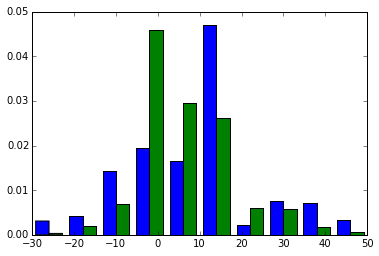

In [35]:
plt.hist([df[df.status=="paid"]["lat"], df[df.status=="defaulted"]["lat"]], normed=True)

([array([  3.87780154e-04,   3.79680307e-06,   4.86719779e-03,
           4.80032343e-03,   4.08536010e-04,   3.20936170e-03,
           7.06787547e-03,   1.96360530e-03,   2.85433530e-03,
           5.72466780e-03]),
  array([  1.98433047e-05,   0.00000000e+00,   4.53690104e-03,
           3.55736336e-03,   1.87609427e-04,   6.15864022e-03,
           1.12295065e-02,   1.13648018e-03,   5.41181038e-05,
           4.40701759e-03])],
 array([-172.616667 , -140.6550003, -108.6933336,  -76.7316669,
         -44.7700002,  -12.8083335,   19.1533332,   51.1149999,
          83.0766666,  115.0383333,  147.       ]),
 <a list of 2 Lists of Patches objects>)

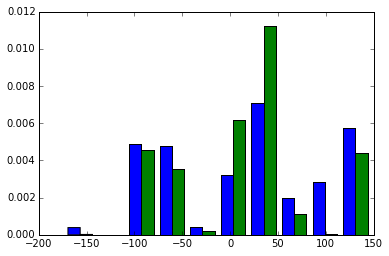

In [36]:
plt.hist([df[df.status=="paid"]["lit"], df[df.status=="defaulted"]["lit"]], normed=True)

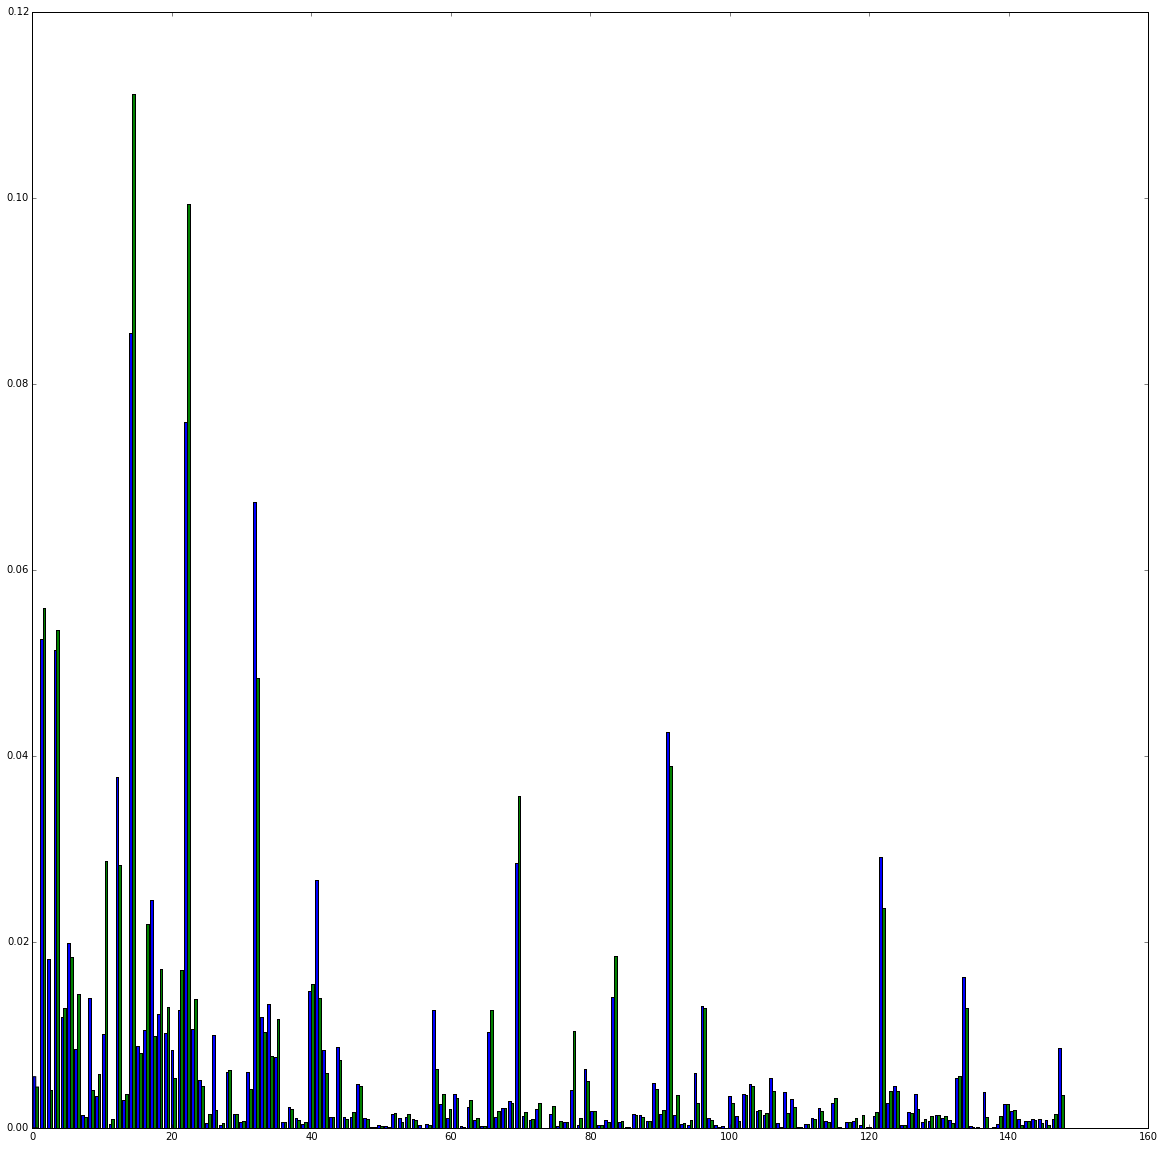

In [52]:
plt.figure(figsize=(20,20))
plt.hist([df[df.status=="paid"]["activity"], df[df.status=="defaulted"]["activity"]],bins=150, normed=True)
plt.show()

([array([  1.99023523e-04,   1.06908071e-06,   2.26637340e-09,
           2.26637340e-09,   1.61883814e-09,   6.47535257e-10,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           6.47535257e-10]),
  array([  1.98704057e-04,   1.37291893e-06,   2.30742678e-08,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00])],
 array([  2.50000000e+01,   5.02250000e+03,   1.00200000e+04,
          1.50175000e+04,   2.00150000e+04,   2.50125000e+04,
          3.00100000e+04,   3.50075000e+04,   4.00050000e+04,
          4.50025000e+04,   5.00000000e+04]),
 <a list of 2 Lists of Patches objects>)

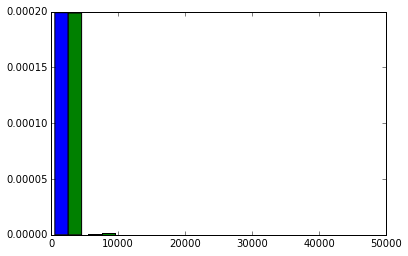

In [40]:
plt.hist([df[df.status=="paid"]["funded_amount"], df[df.status=="defaulted"]["funded_amount"]], normed=True)

([array([  4.09028897e-01,   6.76740513e-03,   7.35528890e-04,
           7.68563644e-05,   4.11248967e-05,   1.01126795e-05,
           2.69671454e-06,   2.02253590e-06,   6.74178635e-07,
           1.34835727e-06]),
  array([  3.75754343e-01,   3.82937423e-02,   1.89787054e-03,
           4.32426199e-04,   1.44142066e-04,   1.44142066e-04,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00])],
 array([  0. ,   2.4,   4.8,   7.2,   9.6,  12. ,  14.4,  16.8,  19.2,
         21.6,  24. ]),
 <a list of 2 Lists of Patches objects>)

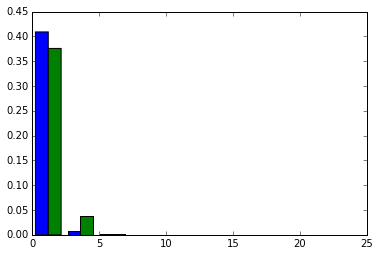

In [41]:
plt.hist([df[df.status=="paid"]["entries"], df[df.status=="defaulted"]["entries"]], normed=True)

([array([  5.99853483e-03,   1.80202838e-05,   1.55766905e-07,
           6.81480208e-08,   3.89417262e-08,   9.73543155e-09,
           9.73543155e-09,   0.00000000e+00,   0.00000000e+00,
           9.73543155e-09]),
  array([  5.98805345e-03,   2.63653359e-05,   2.42838620e-06,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           0.00000000e+00])],
 array([  1.00000000e+00,   1.67200000e+02,   3.33400000e+02,
          4.99600000e+02,   6.65800000e+02,   8.32000000e+02,
          9.98200000e+02,   1.16440000e+03,   1.33060000e+03,
          1.49680000e+03,   1.66300000e+03]),
 <a list of 2 Lists of Patches objects>)

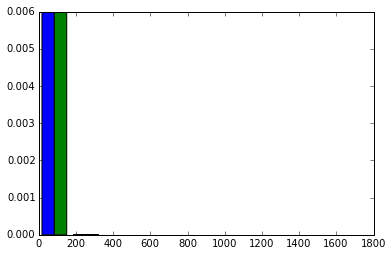

In [44]:
plt.hist([df[df.status=="paid"]["lender_count"], df[df.status=="defaulted"]["lender_count"]], normed=True)

([array([  7.14346292e-02,   1.25025447e-02,   7.47286414e-04,
           4.60796908e-05,   4.38854198e-06,   4.52568391e-06,
           5.75996135e-06,   2.74283874e-07,   0.00000000e+00,
           2.74283874e-07]),
  array([  6.45316702e-02,   1.85479079e-02,   1.49028238e-03,
           1.31926637e-04,   0.00000000e+00,   3.90893739e-05,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
           4.88617174e-06])],
 array([   3. ,   14.8,   26.6,   38.4,   50.2,   62. ,   73.8,   85.6,
          97.4,  109.2,  121. ]),
 <a list of 2 Lists of Patches objects>)

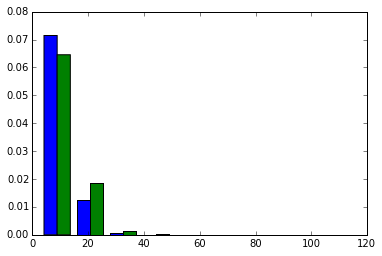

In [45]:
plt.hist([df[df.status=="paid"]["repayment_term"], df[df.status=="defaulted"]["repayment_term"]], normed=True)

([array([  2.22832519e-03,   5.16454793e-03,   5.78447266e-03,
           7.70836874e-03,   2.67929576e-03,   6.76096298e-04,
           3.77939549e-04,   5.52127332e-05,   1.42226722e-05,
           2.87649551e-06]),
  array([  6.48746071e-03,   1.91477609e-03,   4.41893308e-03,
           7.80858503e-03,   3.17610815e-03,   5.29588629e-04,
           9.96537743e-05,   3.27433830e-05,   2.23509180e-04,
           0.00000000e+00])],
 array([   1. ,   41.5,   82. ,  122.5,  163. ,  203.5,  244. ,  284.5,
         325. ,  365.5,  406. ]),
 <a list of 2 Lists of Patches objects>)

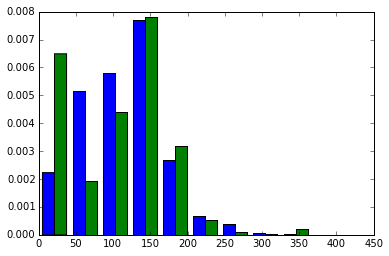

In [46]:
 plt.hist([df[df.status=="paid"]["partner_id"], df[df.status=="defaulted"]["partner_id"]], normed=True)

([array([  9.28044645e-01,   3.42569041e-02,   1.45800568e-02,
           1.33972778e-02,   6.95590548e-03,   1.81381020e-03,
           6.92516294e-04,   1.89309361e-04,   5.66310053e-05,
           1.29442298e-05]),
  array([  9.60101476e-01,   2.46771218e-02,   7.72601476e-03,
           3.69003690e-03,   2.07564576e-03,   1.38376384e-03,
           2.88284133e-04,   5.76568266e-05,   0.00000000e+00,
           0.00000000e+00])],
 array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 <a list of 2 Lists of Patches objects>)

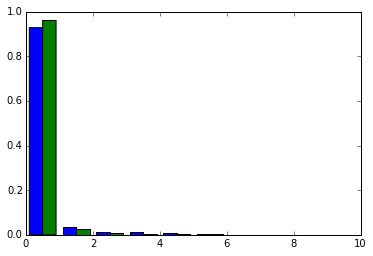

In [47]:
plt.hist([df[df.status=="paid"]["len_teg"], df[df.status=="defaulted"]["len_teg"]], normed=True)

([array([ 6.56922898,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  3.43077102]),
  array([ 7.07391605,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  2.92608395])],
 array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ]),
 <a list of 2 Lists of Patches objects>)

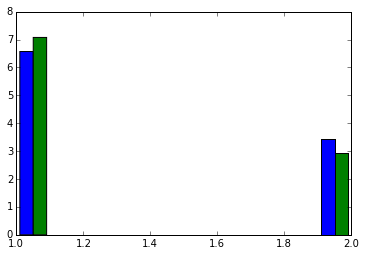

In [48]:
plt.hist([df[df.status=="paid"]["description_lang"], df[df.status=="defaulted"]["description_lang"]], normed=True)

In [53]:
def change_status_paid(x):
    if x=='paid':
        return 1
    else:
        return 0
    
def  change_status_default(x):
    if x== "defaulted":
        return 1
    else:
        return 0

df["paid"] = df.status.apply(lambda x: change_status_paid(x))

df["defaulted"] = df.status.apply(lambda x: change_status_default(x))

In [54]:
df.head()

,activity,basket_amount,bonus_credit_eligibility,bulkEntries,country_code,description,description_lang,entries,funded_amount,funded_date,...,repayment_term,sector,status,tags,theme,town,use,video,paid,defaulted
0,0,NaN,False,0,UG,<i>The following description was written by Mo...,1,17,500,2005-03-31T06:27:55Z,...,6,Food,paid,[],None,Tororo,"Buy bulls, open a butcher shop",None,1,0
1,1,NaN,False,0,UG,<i>The following description was written by Mo...,1,16,500,2005-03-31T06:27:55Z,...,6,Food,paid,[],None,Tororo,Buying more produce each time for greater profit,None,1,0
2,2,NaN,False,0,UG,<i>The following description was written by Mo...,1,15,500,2005-03-31T06:27:55Z,...,6,Agriculture,paid,[],None,Tororo,Increase number of goats bought and sold each ...,None,1,0
3,3,NaN,False,0,UG,Eunice received 100 dollar grant from Village ...,1,12,300,2005-03-31T06:27:55Z,...,6,Clothing,paid,[],None,Tororo,Buy used clothing (mutumbe) of higher quality ...,None,1,0
4,1,NaN,False,0,UG,<i>\r\nThe following description was written b...,1,14,500,2005-03-31T06:27:55Z,...,6,Food,paid,[],None,Tororo,Buying and reselling of produce,None,1,0


In [56]:
df_group = df.groupby(country_code).sum()

In [57]:
df_group

,activity,basket_amount,bonus_credit_eligibility,bulkEntries,description_lang,entries,funded_amount,lat,len_teg,lender_count,lit,num_borrowers,partner_id,repayment_term,paid,defaulted
AF,108871,NaN,0,0,2475,2753,1891250,81932.020000,19,59863,161861.450000,5569,84528,32930,1682,580
AL,62027,0,0,0,1419,599,1963175,58179.000000,2077,67085,28380.000000,1419,339293,32088,540,34
AM,339001,25,1271,0,6568,3990,10931250,255560.000000,9116,331789,287505.000000,6389,1023280,164507,2688,6
AZ,410196,25,4784,0,9937,3404,12749975,375131.323545,5561,376896,447206.746519,9325,486563,150465,7479,2
BA,26987,NaN,0,0,614,463,441325,27146.213321,0,13863,11172.891275,614,62014,9225,576,0
BD,429,NaN,0,0,14,0,0,350.050000,0,0,1254.800000,14,546,NaN,0,0
BF,72322,0,0,0,2120,576,1133925,13871.000000,787,37268,-2134.000000,4952,212143,10933,742,9
BG,10564,NaN,0,0,296,66,374300,12671.982876,0,8284,7488.471005,296,5532,4739,289,6
BI,71497,50,0,0,2491,216,3603500,-4385.500000,1161,109606,37590.000000,28698,202986,10448,950,38
BJ,324992,NaN,6285,0,12303,4822,3771700,62083.666407,1362,120658,15551.383590,19213,743411,79322,5410,43


In [58]:
df["lat", "lit", .to_csv("testing.csv")

UnicodeEncodeError: 'ascii' codec can't encode characters in position 409-410: ordinal not in range(128)

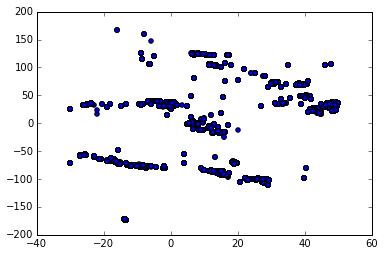

In [59]:
plt.figure(figsize=(20,20))
plt.scatter(df.lat, df.lit, c)

In [88]:
condition_1 = df.status=="paid"
condition_2 = df.status== "defaulted"
df_new = df[condition_1 |condition_2]

In [ ]:
condition_1 = df.status=="paid"
condition_2 = df.status== "defaulted"
df_new = df[condition_1 |condition_2]

In [89]:
df_new.head()

,activity,basket_amount,bonus_credit_eligibility,bulkEntries,country_code,description,description_lang,entries,funded_amount,funded_date,...,partner_id,repayment_interval,repayment_term,sector,status,tags,theme,town,use,video
0,Butcher Shop,NaN,False,0,UG,<i>The following description was written by Mo...,1,17,500,2005-03-31T06:27:55Z,...,1,None,6,Food,paid,[],None,Tororo,"Buy bulls, open a butcher shop",None
1,Food Production/Sales,NaN,False,0,UG,<i>The following description was written by Mo...,1,16,500,2005-03-31T06:27:55Z,...,1,None,6,Food,paid,[],None,Tororo,Buying more produce each time for greater profit,None
2,Animal Sales,NaN,False,0,UG,<i>The following description was written by Mo...,1,15,500,2005-03-31T06:27:55Z,...,1,None,6,Agriculture,paid,[],None,Tororo,Increase number of goats bought and sold each ...,None
3,Clothing Sales,NaN,False,0,UG,Eunice received 100 dollar grant from Village ...,1,12,300,2005-03-31T06:27:55Z,...,1,None,6,Clothing,paid,[],None,Tororo,Buy used clothing (mutumbe) of higher quality ...,None
4,Food Production/Sales,NaN,False,0,UG,<i>\r\nThe following description was written b...,1,14,500,2005-03-31T06:27:55Z,...,1,None,6,Food,paid,[],None,Tororo,Buying and reselling of produce,None


In [91]:
df_new.head()

,activity,basket_amount,bonus_credit_eligibility,bulkEntries,country_code,description,description_lang,entries,funded_amount,funded_date,...,repayment_term,sector,status,tags,theme,town,use,video,paid,defaulted
0,Butcher Shop,NaN,False,0,UG,<i>The following description was written by Mo...,1,17,500,2005-03-31T06:27:55Z,...,6,Food,paid,[],None,Tororo,"Buy bulls, open a butcher shop",None,1,0
1,Food Production/Sales,NaN,False,0,UG,<i>The following description was written by Mo...,1,16,500,2005-03-31T06:27:55Z,...,6,Food,paid,[],None,Tororo,Buying more produce each time for greater profit,None,1,0
2,Animal Sales,NaN,False,0,UG,<i>The following description was written by Mo...,1,15,500,2005-03-31T06:27:55Z,...,6,Agriculture,paid,[],None,Tororo,Increase number of goats bought and sold each ...,None,1,0
3,Clothing Sales,NaN,False,0,UG,Eunice received 100 dollar grant from Village ...,1,12,300,2005-03-31T06:27:55Z,...,6,Clothing,paid,[],None,Tororo,Buy used clothing (mutumbe) of higher quality ...,None,1,0
4,Food Production/Sales,NaN,False,0,UG,<i>\r\nThe following description was written b...,1,14,500,2005-03-31T06:27:55Z,...,6,Food,paid,[],None,Tororo,Buying and reselling of produce,None,1,0


In [97]:
df_new.groupby(country_code).sum()

KeyError: u'UG'

In [102]:
z = df.groupby(country_code).sum()

In [108]:
z["ratio_default_total"] = z.defaulted /(z.defaulted + z.paid +1)

In [109]:
z.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, AF to ZW
Data columns (total 16 columns):
basket_amount               46 non-null float64
bonus_credit_eligibility    90 non-null float64
bulkEntries                 90 non-null int64
description_lang            90 non-null int64
entries                     90 non-null int64
funded_amount               90 non-null int64
lat                         90 non-null float64
len_teg                     90 non-null int64
lender_count                90 non-null int64
lit                         90 non-null float64
num_borrowers               90 non-null int64
partner_id                  90 non-null int64
repayment_term              89 non-null float64
paid                        90 non-null int64
defaulted                   90 non-null int64
ratio_default_total         90 non-null float64
dtypes: float64(6), int64(10)
memory usage: 12.0+ KB


In [112]:
z.head()

,basket_amount,bonus_credit_eligibility,bulkEntries,description_lang,entries,funded_amount,lat,len_teg,lender_count,lit,num_borrowers,partner_id,repayment_term,paid,defaulted,ratio_default_total,normalized_paid
AF,NaN,0,0,2475,2753,1891250,81932.020000,19,59863,161861.450000,5569,84528,32930,1682,580,0.256297,0.002722
AL,0,0,0,1419,599,1963175,58179.000000,2077,67085,28380.000000,1419,339293,32088,540,34,0.059130,0.000874
AM,25,1271,0,6568,3990,10931250,255560.000000,9116,331789,287505.000000,6389,1023280,164507,2688,6,0.002226,0.004349
AZ,25,4784,0,9937,3404,12749975,375131.323545,5561,376896,447206.746519,9325,486563,150465,7479,2,0.000267,0.012101
BA,NaN,0,0,614,463,441325,27146.213321,0,13863,11172.891275,614,62014,9225,576,0,0.000000,0.000932


In [111]:
z["normalized_paid"] = z.paid/sum(z.paid)

In [113]:
z["normalized_default"] = z.defaulted/sum(z.defaulted)

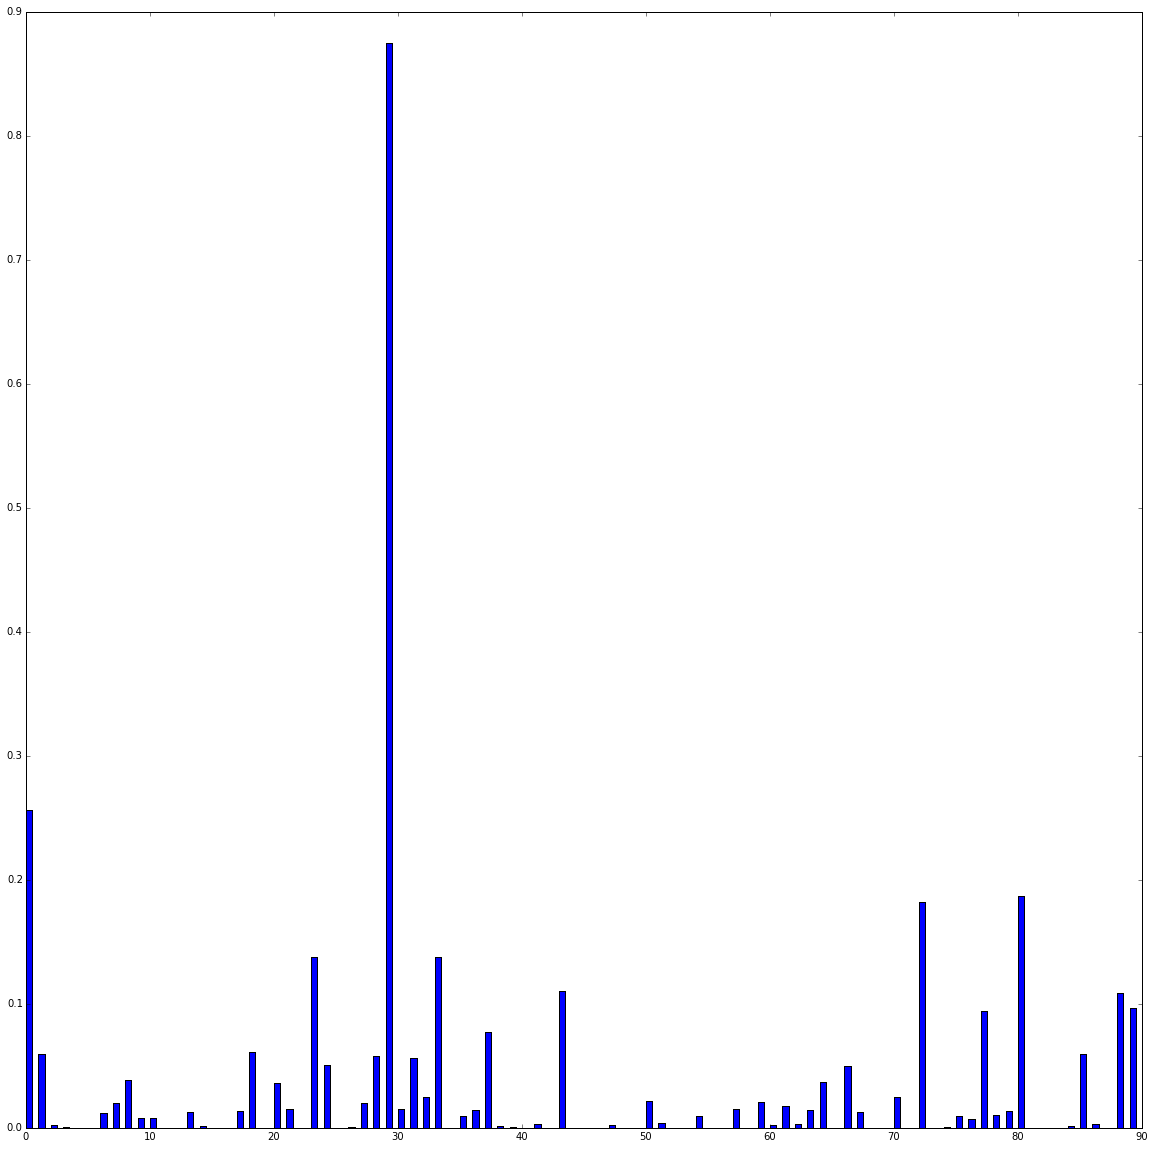

In [143]:
plt.figure(figsize=(20,20))
plt.bar(np.arange(90), z.ratio_default_total, width= 0.5)
plt.show()

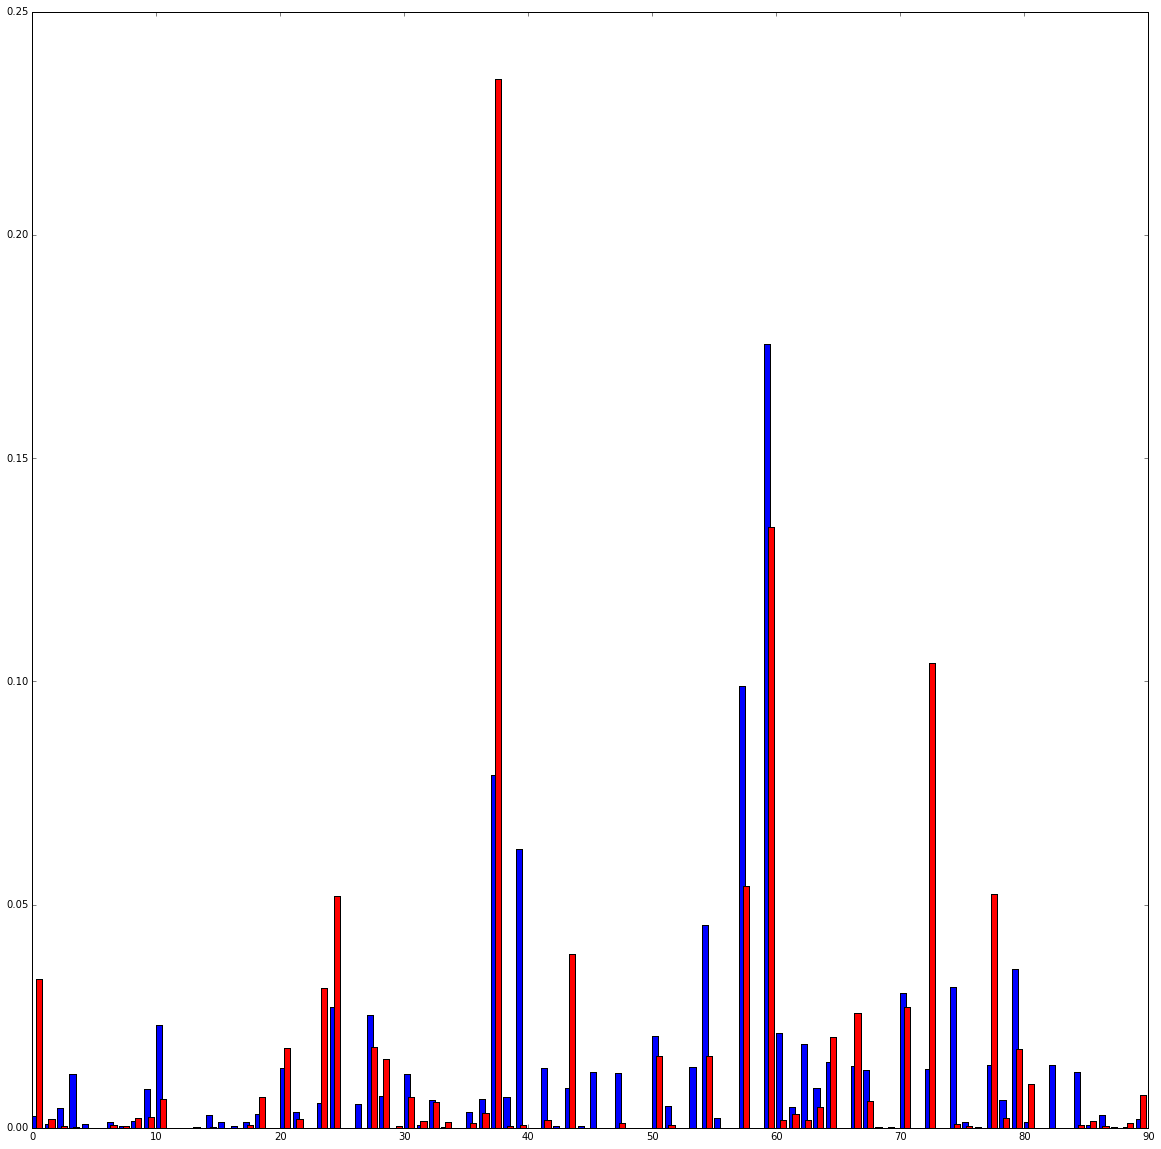

In [148]:
plt.figure(figsize=(20,20))
plt.bar(np.arange(90), z.normalized_paid, width= 0.5)
plt.bar(np.arange(90)+0.3, z.normalized_default, width= 0.5, color='r')
plt.show()

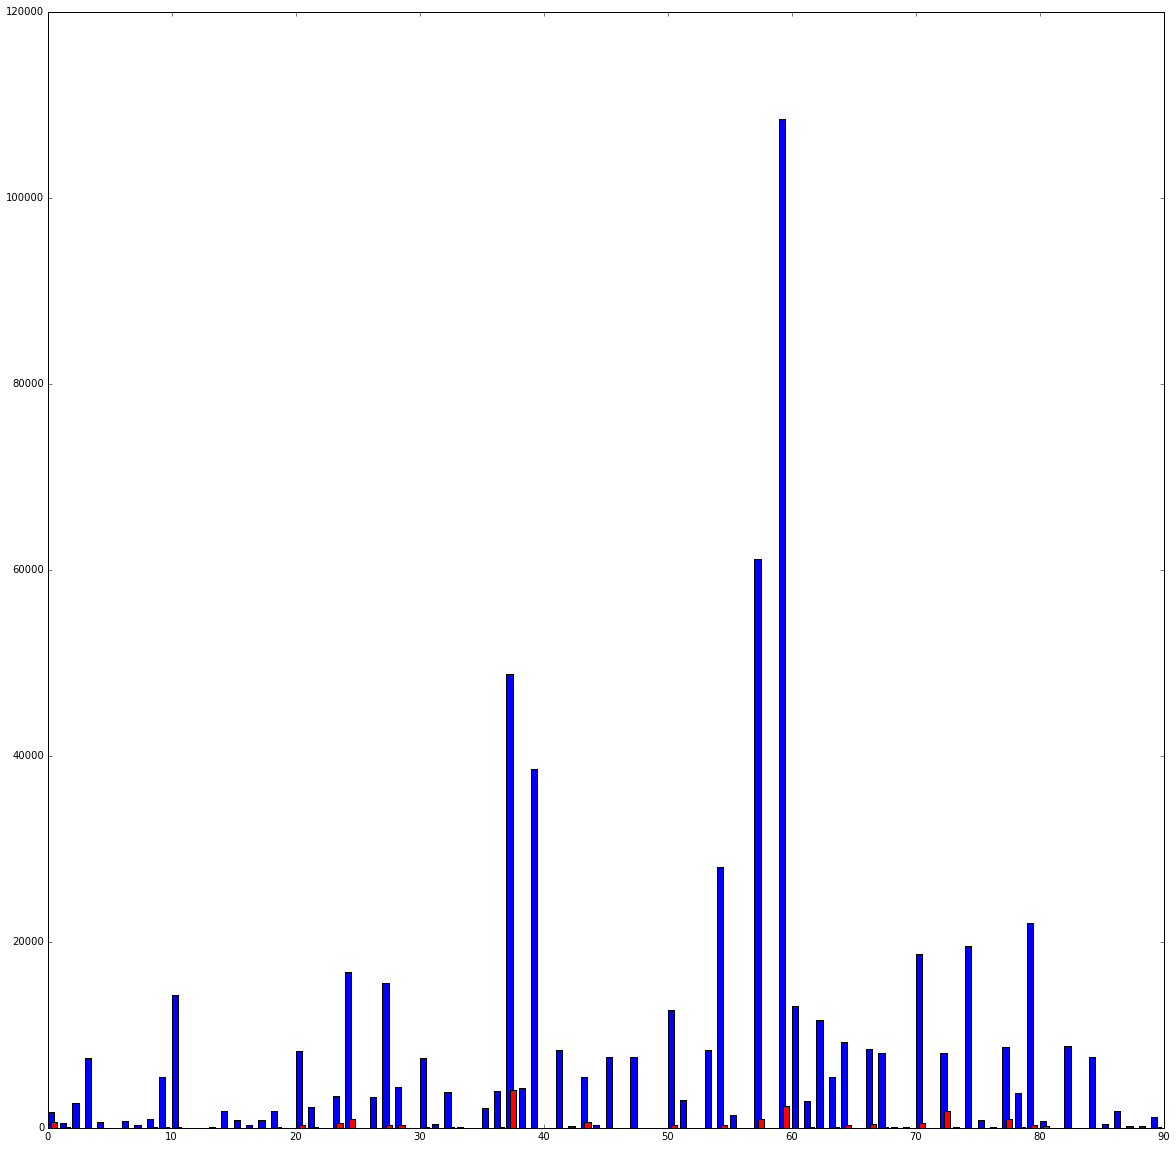

In [149]:
plt.figure(figsize=(20,20))
plt.bar(np.arange(90), z.paid, width= 0.5)
plt.bar(np.arange(90)+0.3, z.defaulted, width= 0.5, color='r')
plt.show()

In [150]:
z1 = df.groupby(country_code).mean()

In [158]:
z2 = z1[["lat", "lit"]]

In [160]:
z2[["normalized_default", "normalized_paid", "ratio_default_total","defaulted", "paid"]] = z[["normalized_default", "normalized_paid", "ratio_default_total","defaulted", "paid"]]

/home/patanjalichanakya/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [161]:
z2.head()

,lat,lit,normalized_default,normalized_paid,ratio_default_total,defaulted,paid
AF,33.103846,65.398566,0.033441,0.002722,0.256297,580,1682
AL,41.000000,20.000000,0.001960,0.000874,0.059130,34,540
AM,40.000000,45.000000,0.000346,0.004349,0.002226,6,2688
AZ,40.228560,47.957828,0.000115,0.012101,0.000267,2,7479
BA,44.212074,18.196891,0.000000,0.000932,0.000000,0,576


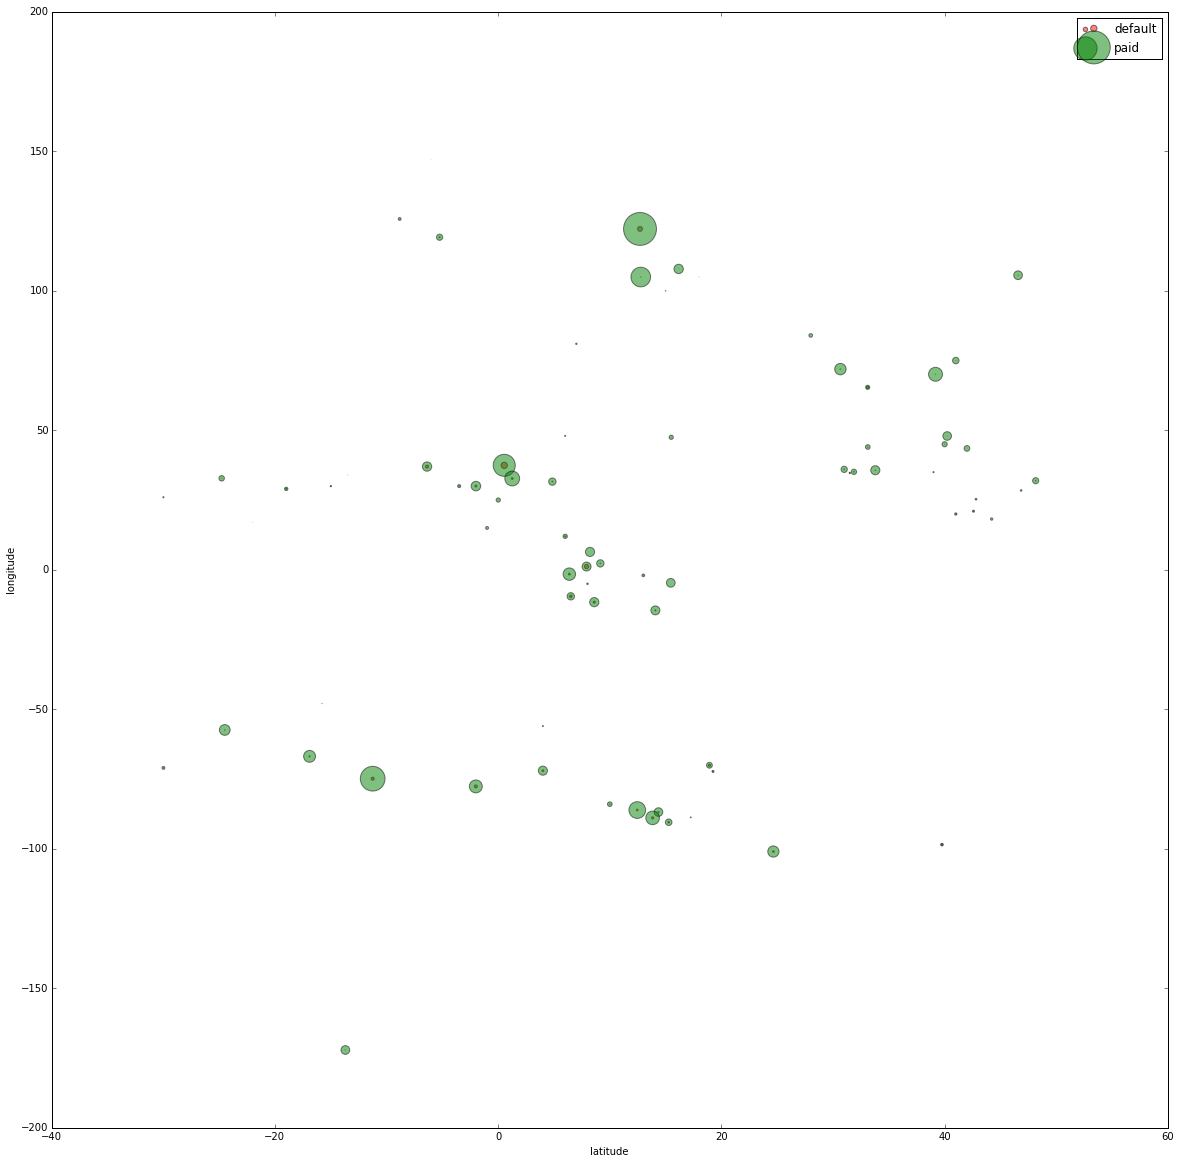

In [183]:
plt.figure(figsize=(20,20))
plt.scatter(z2.lat, z2.lit, s= z2.defaulted/100, c = "r", alpha= 0.5, label = "default")
plt.scatter(z2.lat, z2.lit, s= z2.paid/100, c = "g", alpha=0.5, label = "paid")
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.legend()

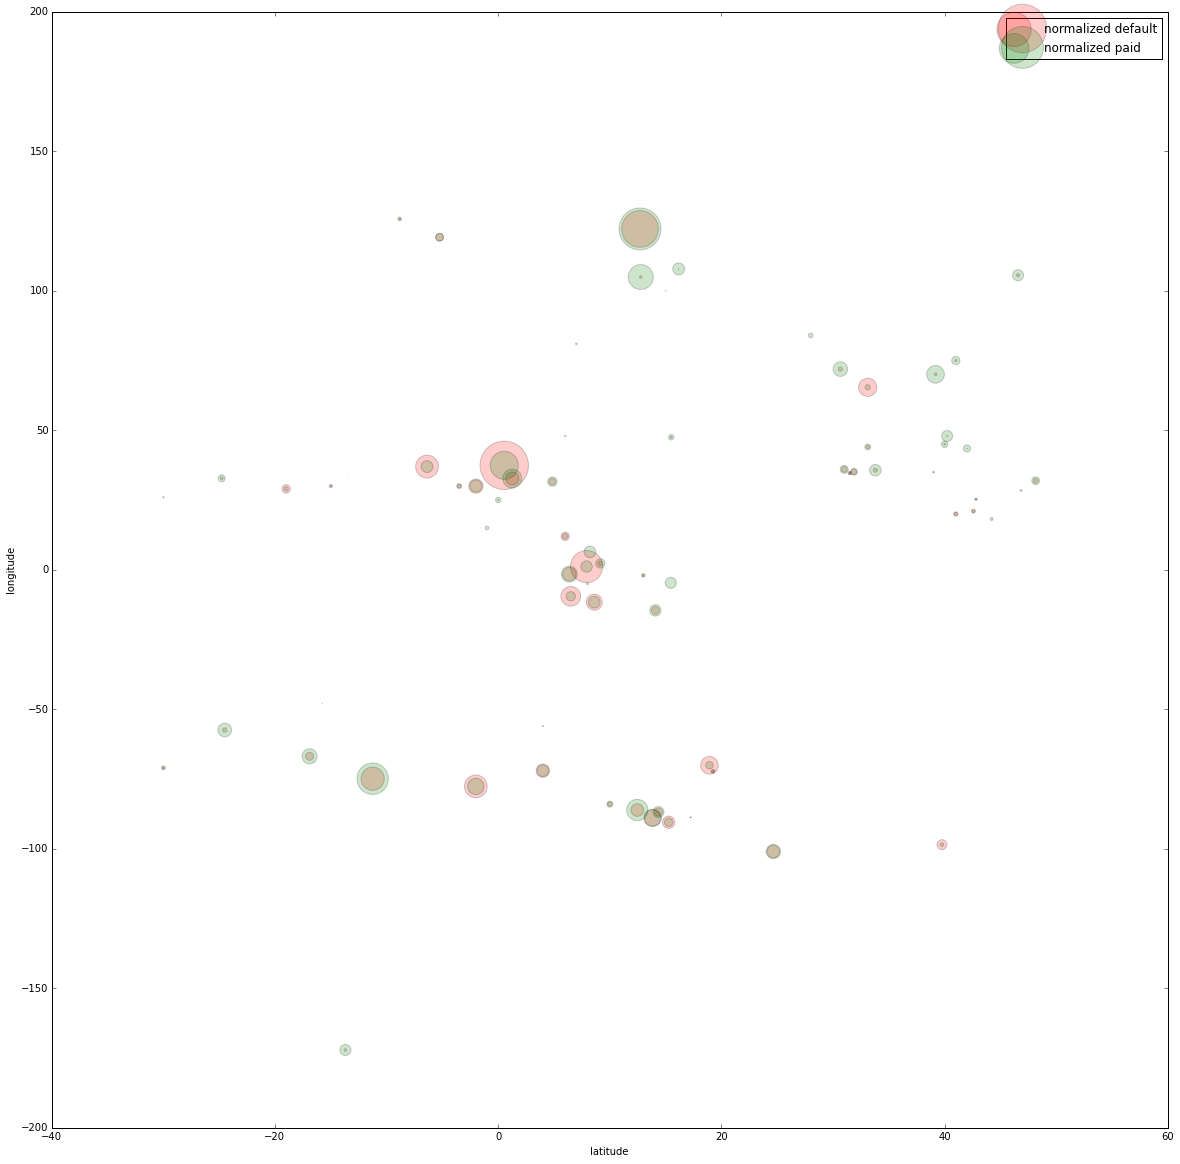

In [189]:
plt.figure(figsize=(20,20))
plt.scatter(z2.lat, z2.lit, s= z2.normalized_default*10000, c = "r", alpha= 0.2, label = "normalized default")
plt.scatter(z2.lat, z2.lit, s= z2.normalized_paid*10000, c = "g", alpha=0.2, label = "normalized paid")
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.legend()

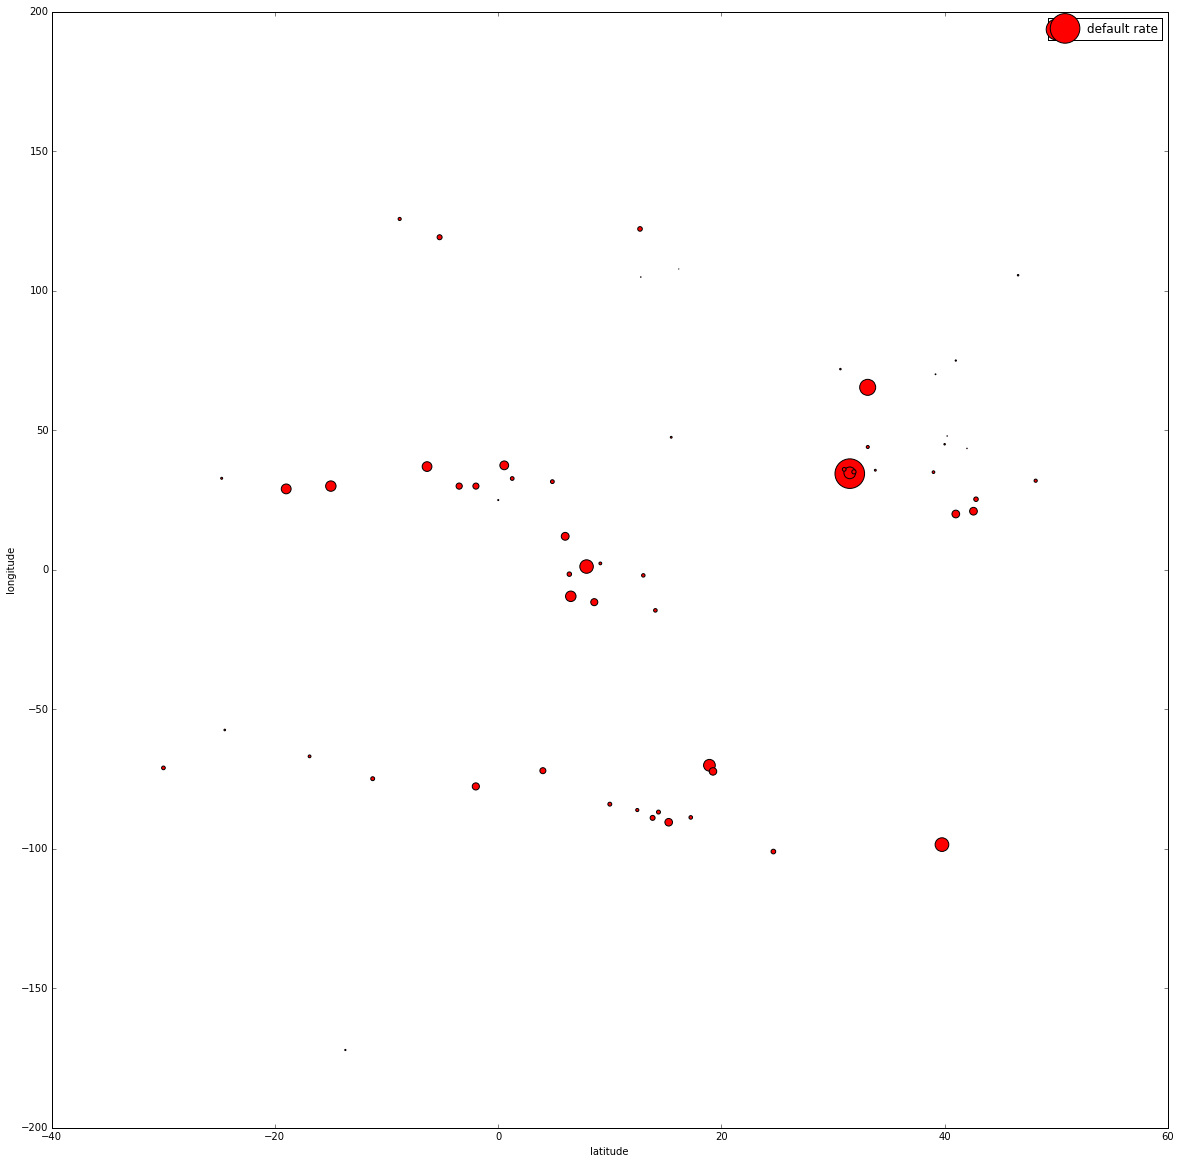

In [188]:
plt.figure(figsize=(20,20))
plt.scatter(z2.lat, z2.lit, s= z2.ratio_default_total*1000, c = "r", label = "default rate")
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.legend()

In [190]:
z2.to_csv("test_plot")

In [23]:
condition_1 = df.status == 0
condition_2 = df.status == 1
y = df[condition_1 |condition_2]["status"]

In [125]:
list_of_columns = list(df.columns)
list_of_columns.remove("description")
list_of_columns.remove("funded_date")
list_of_columns.remove("paid")
list_of_columns.remove("defaulted")
list_of_columns

['activity',
 'basket_amount',
 'country_code',
 'description_lang',
 'entries',
 'funded_amount',
 'geo_level',
 'lat',
 'len_teg',
 'lender_count',
 'long',
 'num_borrowers',
 'partner_id',
 'repayment_interval',
 'repayment_term',
 'sector',
 'status',
 'theme',
 'town',
 'num_male',
 'num_female',
 'male_ratio',
 'ratio_of_picture']

In [126]:
df.corr()

,activity,basket_amount,country_code,description_lang,entries,funded_amount,geo_level,lat,len_teg,lender_count,long,num_borrowers,partner_id,repayment_interval,repayment_term,sector,status,theme,town,num_male,num_female,male_ratio,ratio_of_picture,paid,defaulted
activity,1.000000,-0.000627,-0.018040,0.047300,-0.041923,0.029747,-0.004484,-0.000064,0.039916,0.037061,-0.044685,0.001234,0.064209,0.038345,0.112526,0.325330,0.070051,0.098776,0.015196,0.051399,-0.014947,0.092023,0.005067,-0.063071,-0.013364
basket_amount,-0.000627,1.000000,0.004695,0.006697,-0.027821,-0.018096,0.010914,0.005696,0.060271,-0.019302,-0.002658,0.005436,0.018942,0.008395,0.023684,0.002172,0.128971,0.029625,0.023732,0.014448,0.001352,0.007453,-0.000950,-0.063233,-0.005295
country_code,-0.018040,0.004695,1.000000,-0.003419,-0.019497,0.011053,0.257411,0.193536,0.058794,0.012919,0.211350,-0.046451,0.187873,0.015852,-0.036079,0.038629,0.058992,0.129334,0.242708,-0.081037,-0.024994,-0.073420,0.023805,-0.035855,-0.043759
description_lang,0.047300,0.006697,-0.003419,1.000000,0.006301,0.128977,-0.125734,-0.226244,0.053170,0.108118,-0.657202,0.111498,-0.098423,0.177098,-0.019033,0.034102,-0.023095,-0.015219,-0.109054,0.032405,0.111381,0.074589,-0.085879,0.025675,-0.013573
entries,-0.041923,-0.027821,-0.019497,0.006301,1.000000,0.008966,-0.036731,-0.012437,-0.191899,0.022237,0.001725,-0.016386,-0.109800,-0.085175,-0.046726,-0.030006,-0.312239,-0.088247,-0.110354,0.001121,-0.018233,-0.000798,0.006505,0.259149,0.150311
funded_amount,0.029747,-0.018096,0.011053,0.128977,0.008966,1.000000,-0.028032,0.066426,0.157877,0.909846,-0.132953,0.544214,-0.035953,0.104496,0.149624,0.012939,0.000390,0.085664,-0.030028,0.273762,0.507001,0.058885,-0.330642,0.008138,-0.003275
geo_level,-0.004484,0.010914,0.257411,-0.125734,-0.036731,-0.028032,1.000000,0.165840,0.077424,-0.007231,0.234038,-0.005038,0.340800,0.050510,0.092558,-0.012813,0.146500,0.102535,0.435930,-0.001276,-0.005092,-0.010067,0.037733,-0.171882,0.097367
lat,-0.000064,0.005696,0.193536,-0.226244,-0.012437,0.066426,0.165840,1.000000,0.067300,0.104447,0.383160,-0.146577,0.079973,0.043172,0.209650,0.042287,0.080248,0.101183,0.090421,-0.035341,-0.148725,0.077931,0.126746,-0.069620,-0.029300
len_teg,0.039916,0.060271,0.058794,0.053170,-0.191899,0.157877,0.077424,0.067300,1.000000,0.159947,-0.027598,0.017635,0.209543,0.184305,0.183709,0.036563,0.502266,0.196977,0.182982,0.046581,0.004475,0.055954,0.008207,-0.448927,-0.047888
lender_count,0.037061,-0.019302,0.012919,0.108118,0.022237,0.909846,-0.007231,0.104447,0.159947,1.000000,-0.111836,0.453971,-0.013018,0.107664,0.181644,0.019162,-0.009172,0.070407,-0.020211,0.264812,0.411375,0.063174,-0.256386,0.011457,-0.003448


/home/patanjalichanakya/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


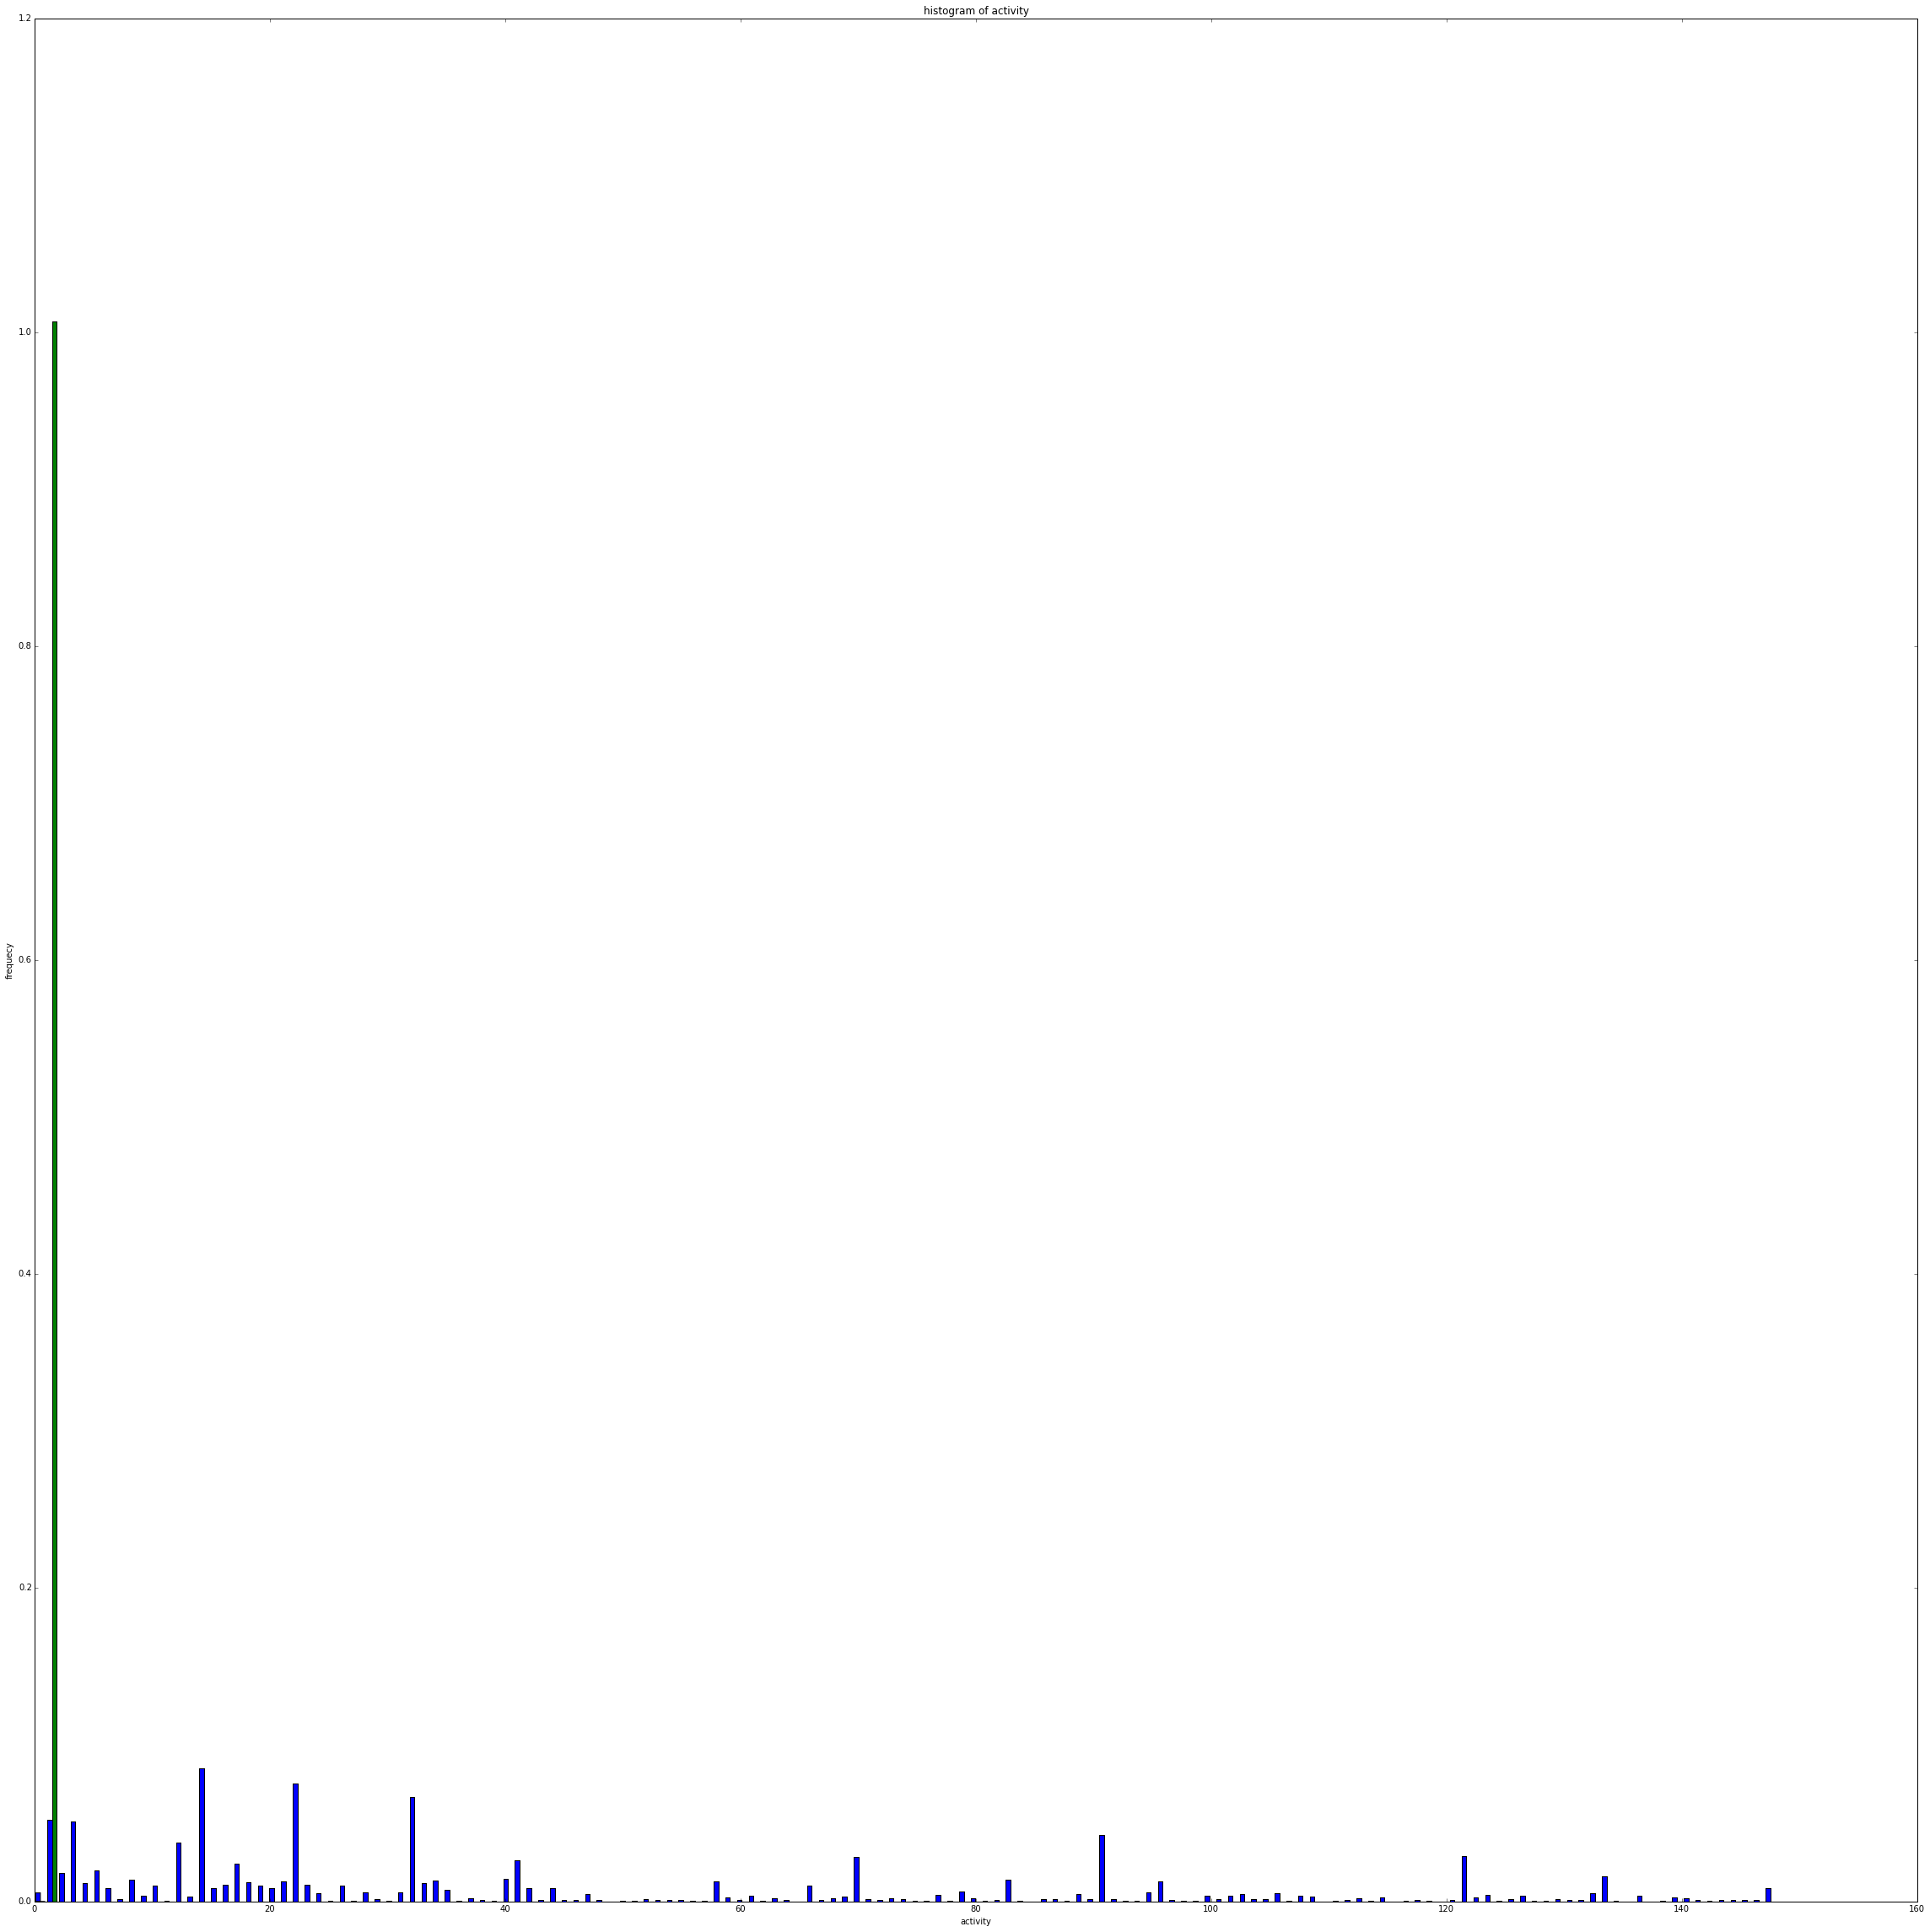

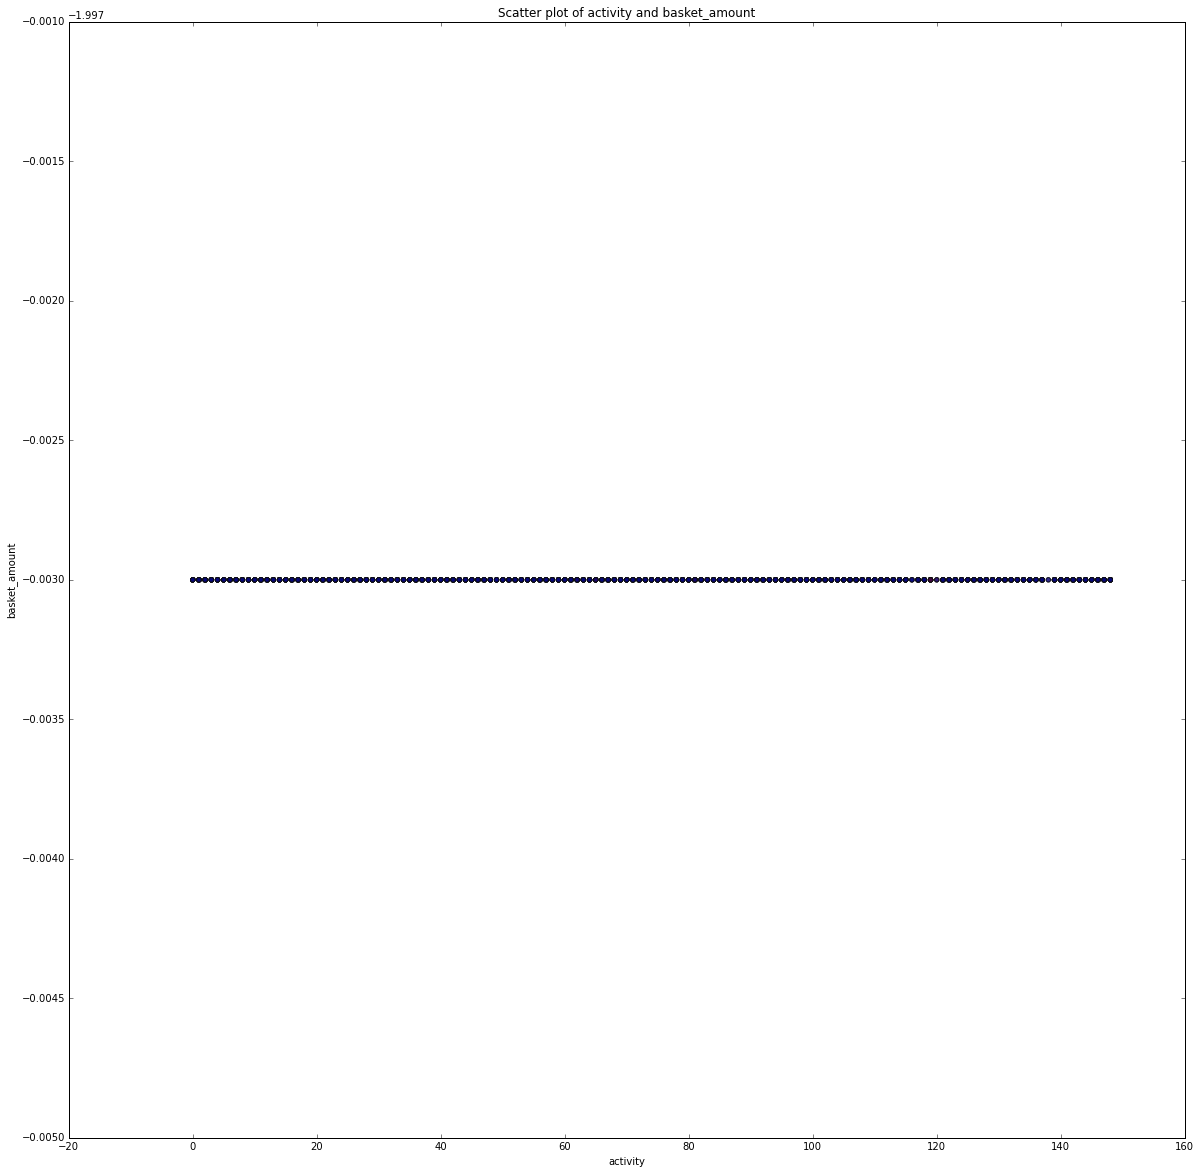

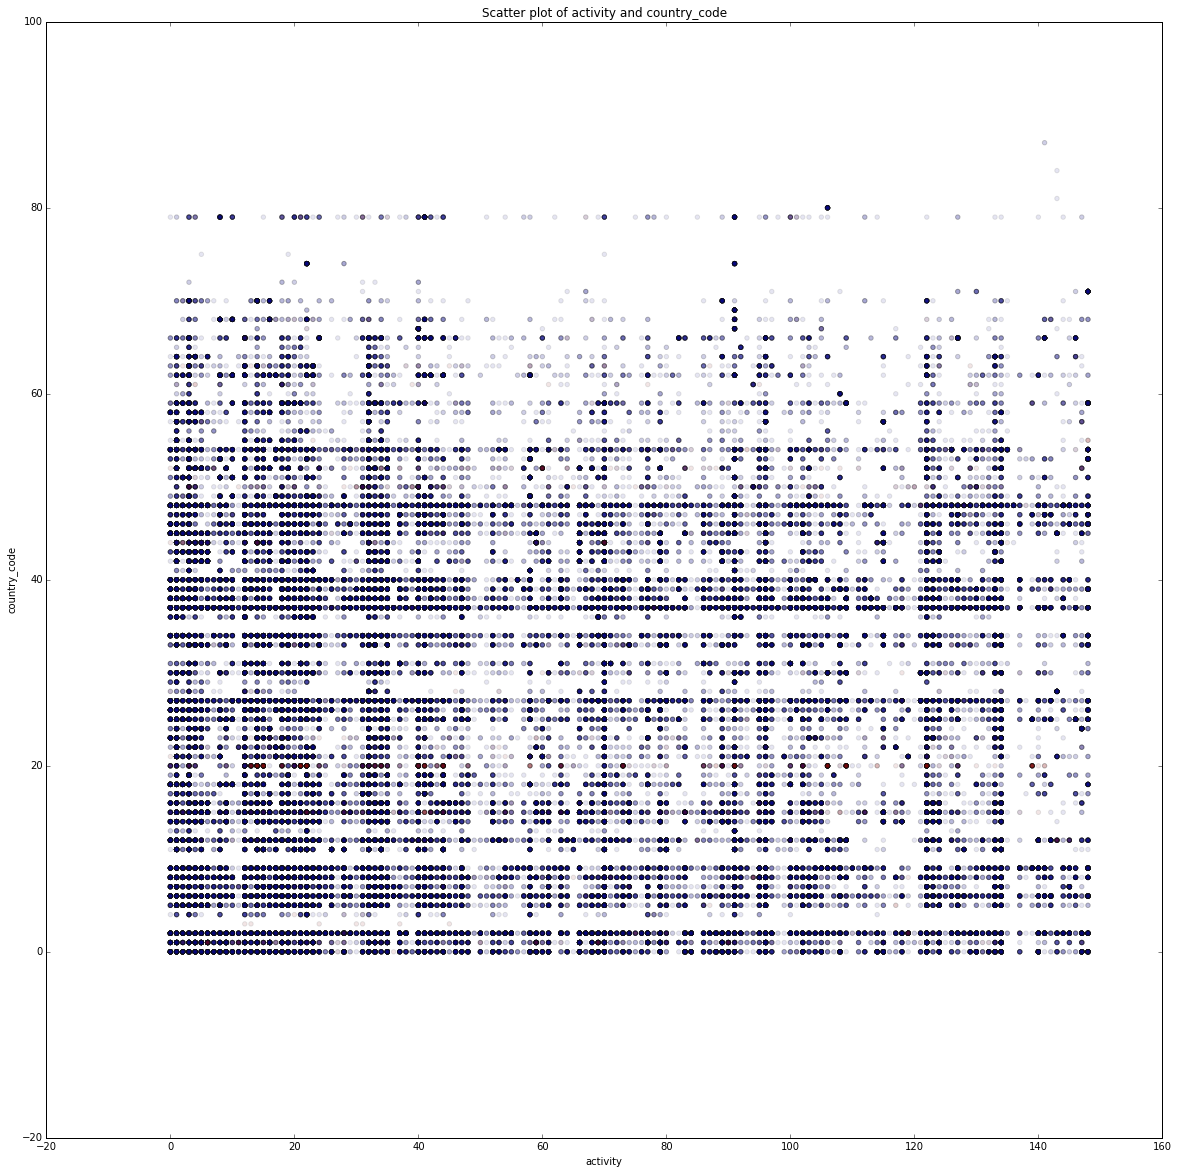

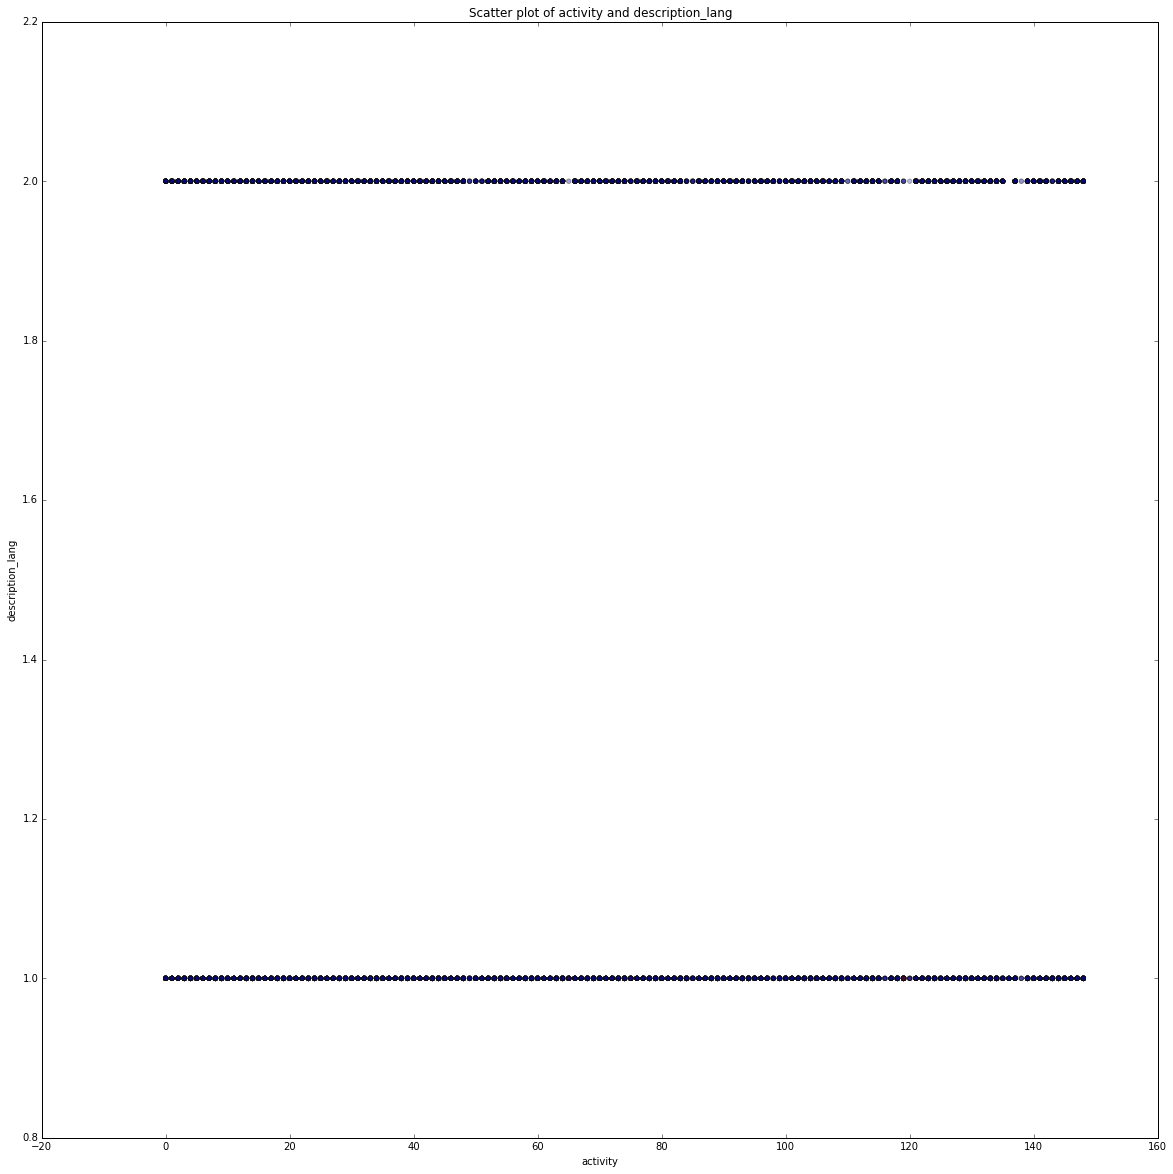

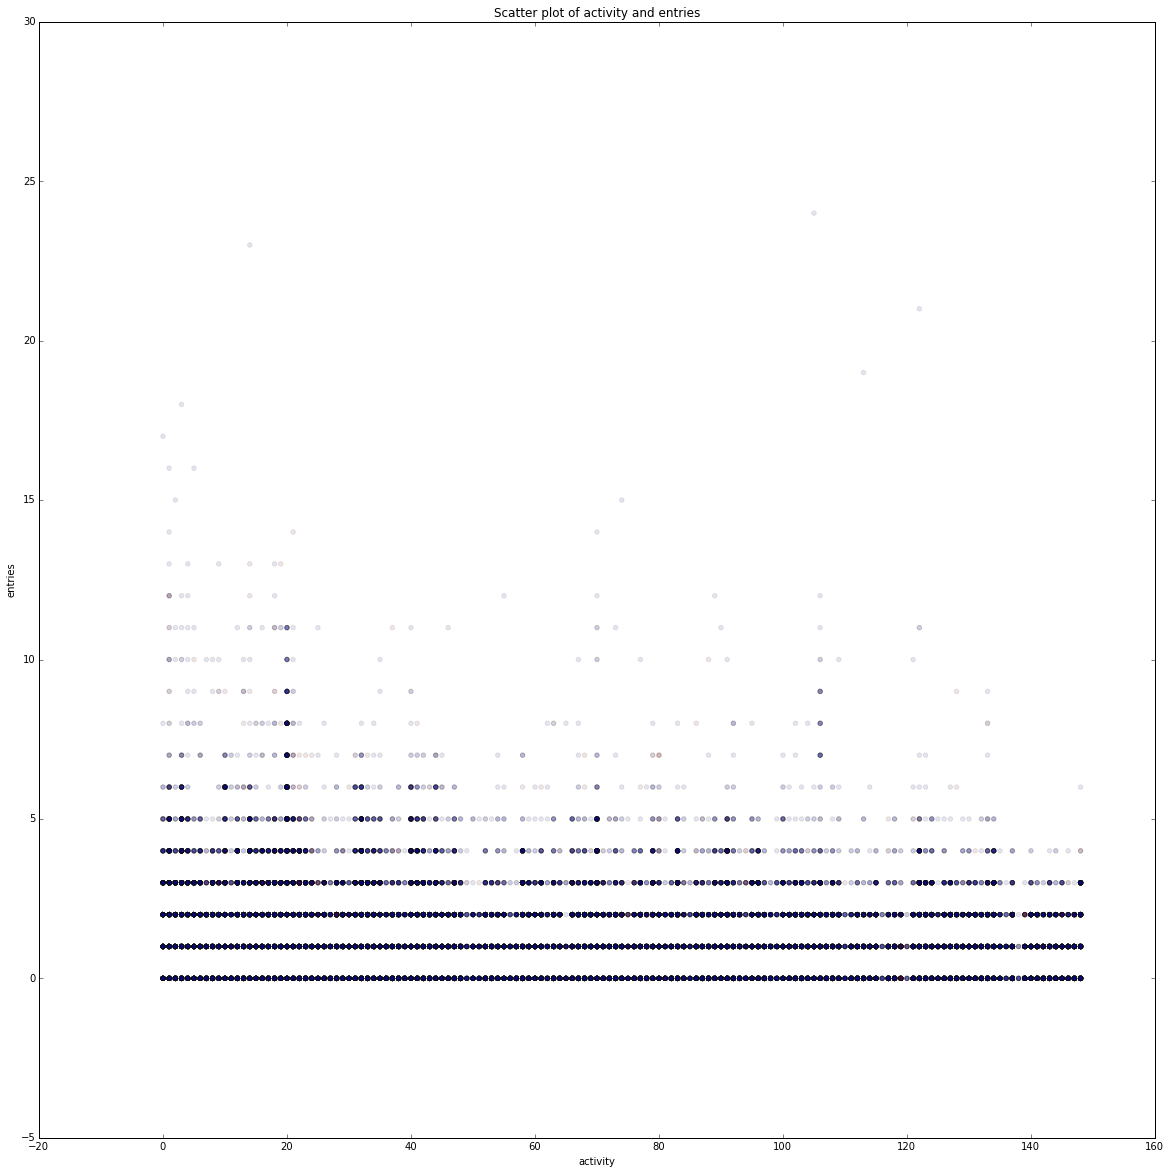

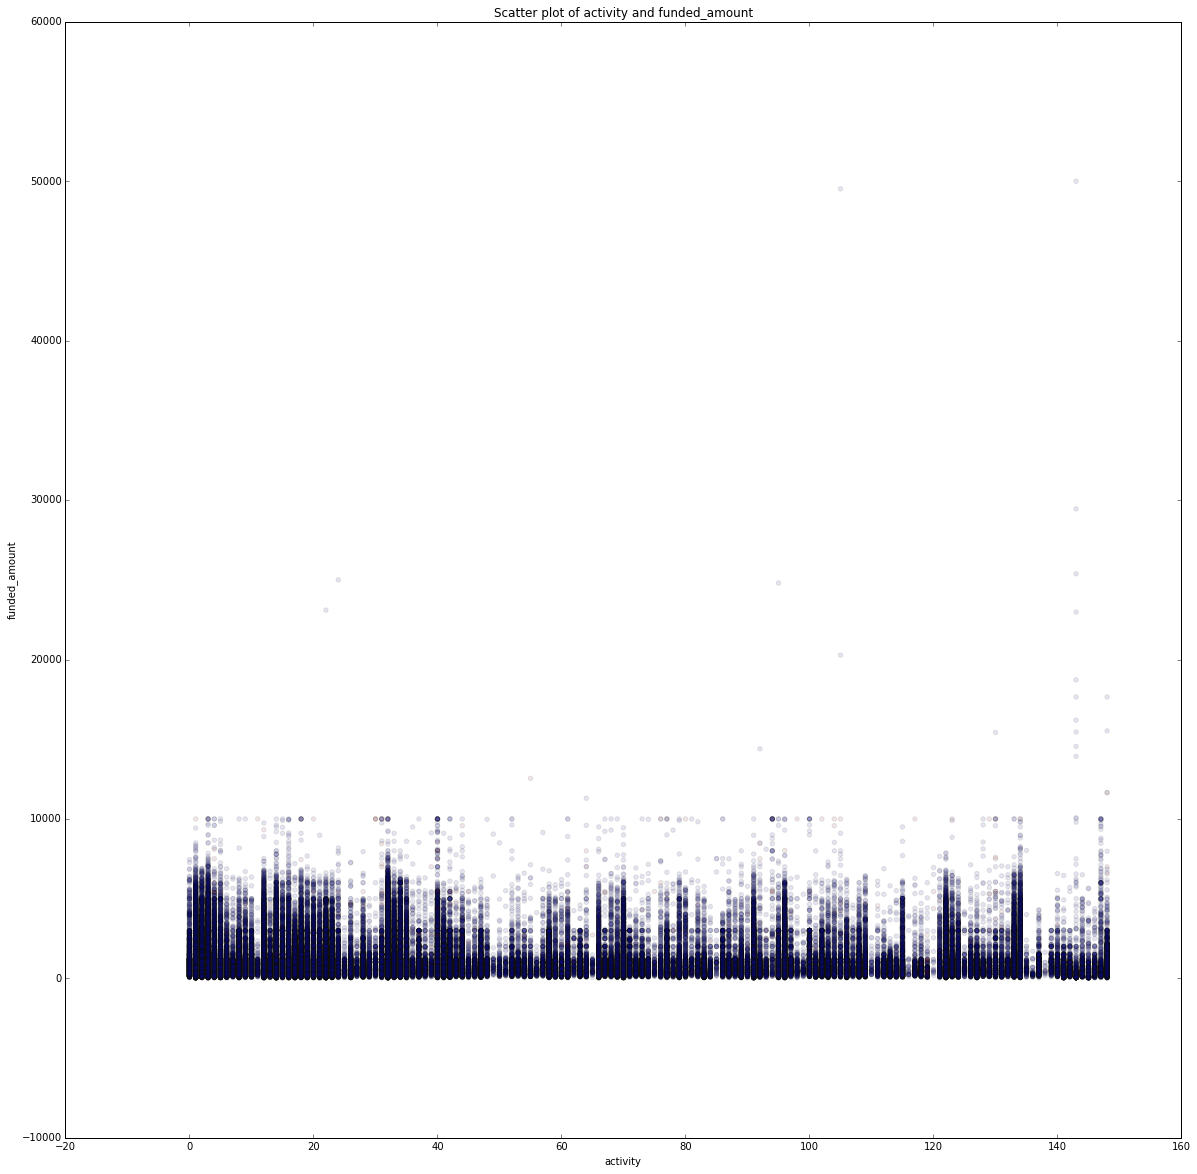

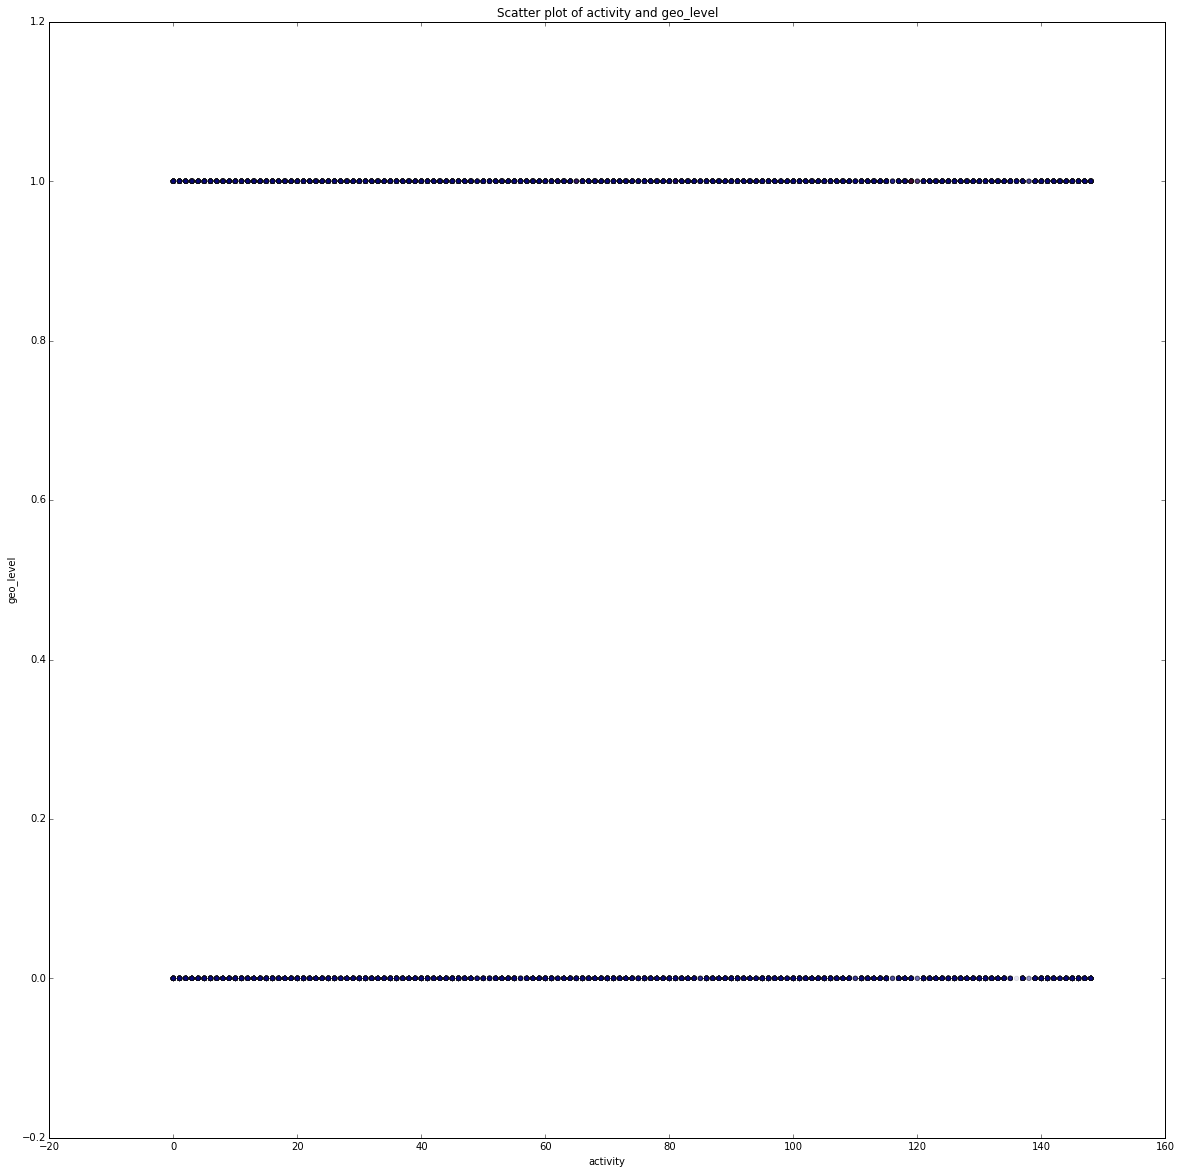

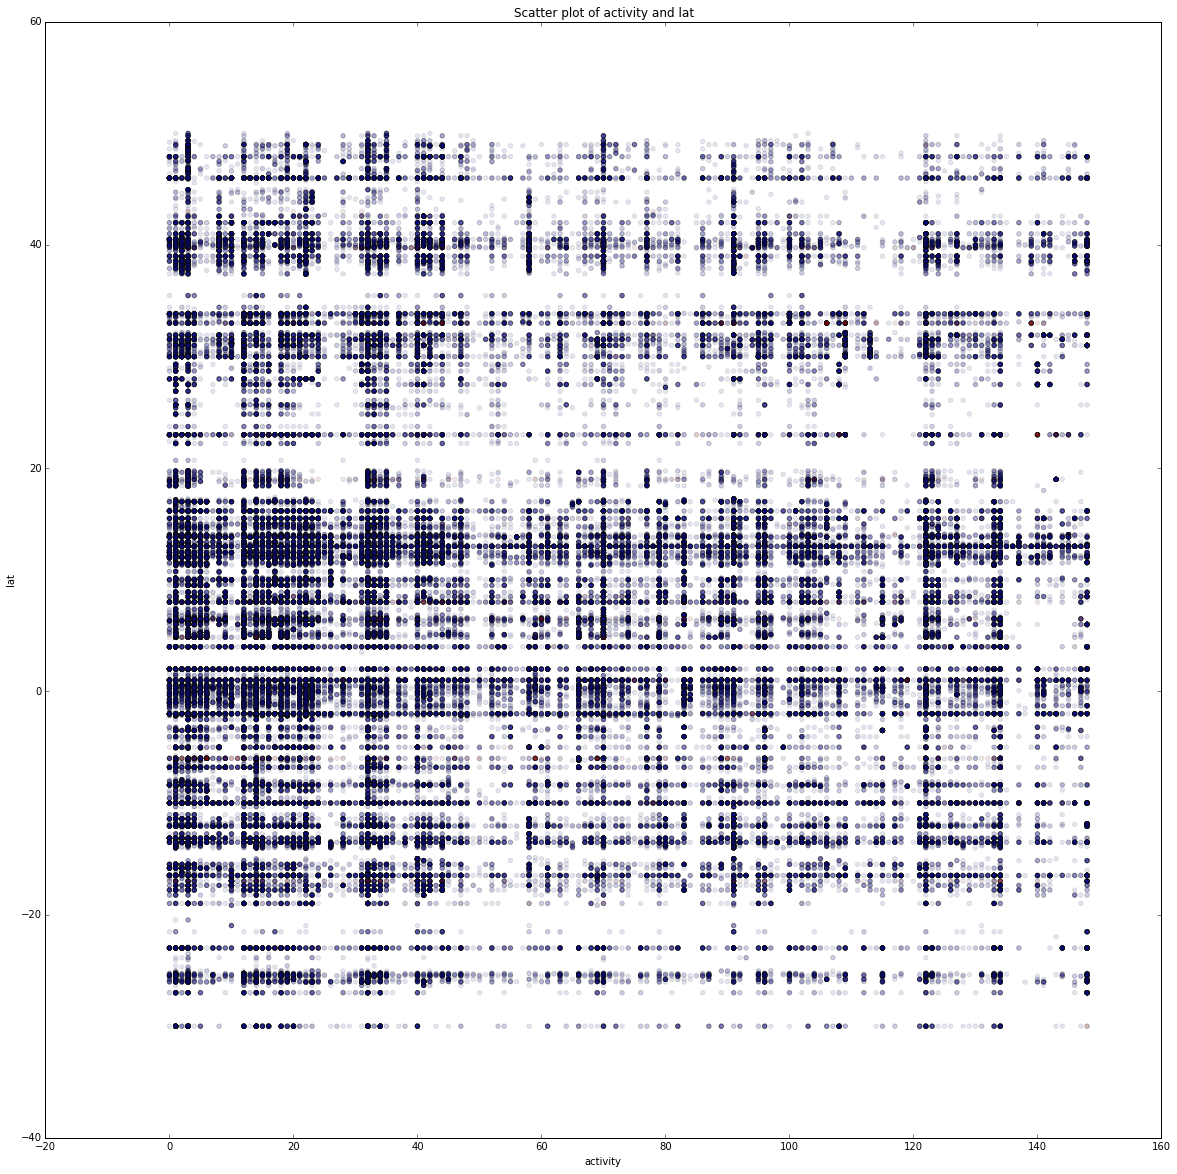

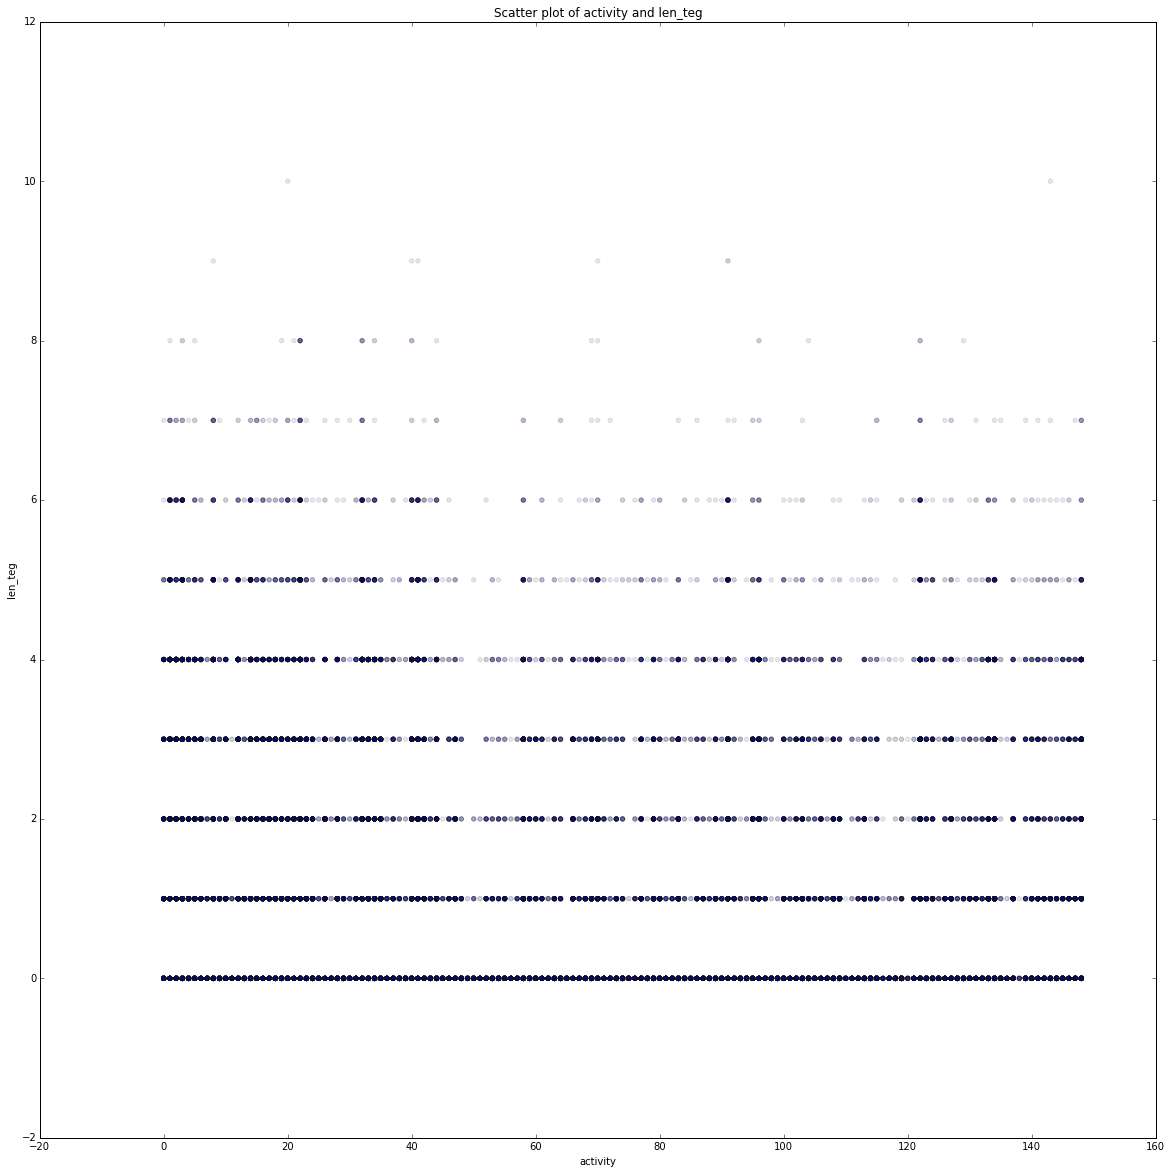

KeyboardInterrupt: 

In [140]:
for i in list_of_columns:
    for j in list_of_columns:
        if i == j:
            plt.figure(figsize=(40,40))
            plt.hist([df_file[df_file.status ==0]["%s" %i], df_file[df_file ==1]["%s" %i]], bins= len(df[i].unique()), normed= True)
            plt.xlabel("%s" %i)
            plt.ylabel("frequecy")
            plt.title("histogram of %s" %i)
            plt.savefig("histogram_of_%s.jpg" %i)
        else:
            plt.figure(figsize=(20,20))
            plt.scatter(df_file[i], df_file[j], c= df_file.status, alpha=0.1)
            plt.xlabel("%s" %i)
            plt.ylabel("%s" %j)
            plt.title("Scatter plot of %s and %s" %(i,j))
            plt.savefig("scatter plot of %s and %s.jpg" %(i,j))

In [24]:
df_file = df[condition_1 | condition_2]

In [129]:
df_file.head()

,activity,basket_amount,country_code,description,description_lang,entries,funded_amount,funded_date,geo_level,lat,len_teg,lender_count,long,num_borrowers,partner_id,repayment_interval,repayment_term,sector,status,theme,town,num_male,num_female,male_ratio,ratio_of_picture,paid,defaulted
0,0,-2,0,<i>The following description was written by Mo...,1,17,500,2005-03-31T06:27:55Z,0,0.75,0,5,34.083333,1,1,0,6,0,0,0,0,1,0,1,1,1,0
1,1,-2,0,<i>The following description was written by Mo...,1,16,500,2005-03-31T06:27:55Z,0,0.75,0,3,34.083333,1,1,0,6,0,0,0,0,1,0,1,1,1,0
2,2,-2,0,<i>The following description was written by Mo...,1,15,500,2005-03-31T06:27:55Z,0,0.75,0,3,34.083333,1,1,0,6,1,0,0,0,1,0,1,1,1,0
3,3,-2,0,Eunice received 100 dollar grant from Village ...,1,12,300,2005-03-31T06:27:55Z,0,0.75,0,4,34.083333,1,1,0,6,2,0,0,0,0,1,0,1,1,0
4,1,-2,0,<i>\r\nThe following description was written b...,1,14,500,2005-03-31T06:27:55Z,0,0.75,0,6,34.083333,1,1,0,6,0,0,0,0,0,1,0,1,1,0


In [28]:
list(df_file.columns)

['activity',
 'basket_amount',
 'country_code',
 'description',
 'description_lang',
 'entries',
 'funded_amount',
 'funded_date',
 'geo_level',
 'lat',
 'len_teg',
 'lender_count',
 'long',
 'num_borrowers',
 'partner_id',
 'repayment_interval',
 'repayment_term',
 'sector',
 'status',
 'theme',
 'town',
 'num_male',
 'num_female',
 'male_ratio',
 'ratio_of_picture',
 'paid',
 'defaulted']

In [29]:
X = df_file[['activity', 'basket_amount', 'country_code', 'description_lang', 'entries', 'funded_amount',  'geo_level',\
 'lat', 'len_teg', 'lender_count',  'long',  'num_borrowers',  'partner_id',  'repayment_interval', \
 'repayment_term',  'sector', 'theme',  'town',  'num_male',  'num_female',  'male_ratio',  'ratio_of_picture']]

,activity,basket_amount,country_code,description_lang,entries,funded_amount,geo_level,lat,len_teg,lender_count,long,num_borrowers,partner_id,repayment_interval,repayment_term,sector,theme,town,num_male,num_female,male_ratio,ratio_of_picture
0,0,-2,0,1,17,500,0,0.75,0,5,34.083333,1,1,0,6,0,0,0,1,0,1,1
1,1,-2,0,1,16,500,0,0.75,0,3,34.083333,1,1,0,6,0,0,0,1,0,1,1
2,2,-2,0,1,15,500,0,0.75,0,3,34.083333,1,1,0,6,1,0,0,1,0,1,1
3,3,-2,0,1,12,300,0,0.75,0,4,34.083333,1,1,0,6,2,0,0,0,1,0,1
4,1,-2,0,1,14,500,0,0.75,0,6,34.083333,1,1,0,6,0,0,0,0,1,0,1


In [32]:
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, AdaBoostRegressor 
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.decomposition import PCA, NMF
from sklearn.cross_validation import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, log_loss

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [34]:
rfmodel = RandomForestClassifier()

In [35]:
rfmodel.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0)

In [36]:
y_test_predict = rfmodel.predict(X_test)

In [41]:
for i in [precision_score, recall_score, confusion_matrix, log_loss]:
    print  "%s, " %i, i(y_test, y_test_predict)

 <function precision_score at 0x7fd987560500>,  0.927272727273
<function recall_score at 0x7fd987560578>,  0.872932985205
<function confusion_matrix at 0x7fd9875600c8>,  [[123393    236]
 [   438   3009]]
<function log_loss at 0x7fd9875601b8>,  0.183192136951


In [42]:
rfmodel.feature_importances_

array([ 0.03152102,  0.        ,  0.064282  ,  0.01030955,  0.06282119,
        0.04857386,  0.01668932,  0.06607965,  0.00324789,  0.04035129,
        0.05271546,  0.01013265,  0.19433498,  0.00754735,  0.04789423,
        0.02005741,  0.00877786,  0.28969729,  0.00847003,  0.01082984,
        0.0044256 ,  0.00124153])

In [44]:
df_file.to_csv("paid_default_file")

UnicodeEncodeError: 'ascii' codec can't encode characters in position 409-410: ordinal not in range(128)

In [2]:
df = pd.read_csv("/home/patanjalichanakya/Documents/Galvanize/find_defaulter/data/1638.csv")

In [5]:
df_new.shape

(635380, 27)

In [4]:
condition_1 = df.status == 1
condition_2 = df.status ==0

df_new = df[condition_1 | condition_2]


In [6]:
def add_paid(x):
    if x == 0:
        return 1
    else:
        return 0

def add_default(x):
    if x ==1:
        return 1
    else:
        return 0

In [7]:
df["paid"] = df.status.apply(lambda x: add_paid(x))

In [8]:
df["default"] = df.status.apply(lambda x: add_default(x))

In [55]:
df_groupby_activity = df_new.groupby("activity").sum()

In [56]:
df_groupby_activity["ratio"] = df_groupby_activity.default/(df_groupby_activity.paid + df_groupby_activity.default)
df_groupby_activity["normalized_paid"] = df_groupby_activity.paid/sum(df_groupby_activity.paid)
df_groupby_activity["normalized_default"] = df_groupby_activity.default/sum(df_groupby_activity.default)

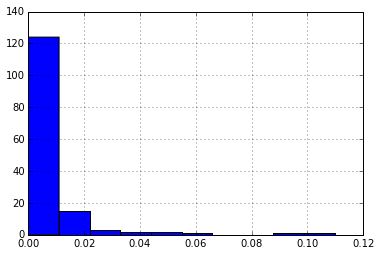

In [30]:
df_groupby_activity.normalized_default.hist()

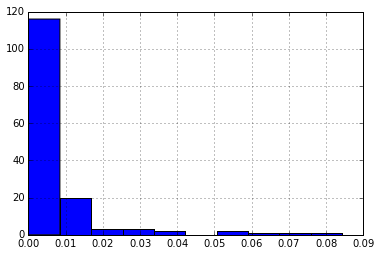

In [31]:
plt.bar(

In [2]:
df_groupby_activity.to_csv("/home/patanjalichanakya/Documents/Galvanize/find_defaulter/data/group_by_activity.csv")

NameError: name 'df_groupby_activity' is not defined

In [11]:
df.columns

Index([u'Unnamed: 0', u'activity', u'basket_amount', u'country_code', u'description', u'description_lang', u'entries', u'funded_amount', u'funded_date', u'geo_level', u'lat', u'len_teg', u'lender_count', u'long', u'num_borrowers', u'partner_id', u'repayment_interval', u'repayment_term', u'sector', u'status', u'theme', u'town', u'num_male', u'num_female', u'male_ratio', u'number_of_picture', u'ratio_of_picture', u'paid', u'default'], dtype='object')

In [37]:
df_groupby_entries = df.groupby("entries").sum()

In [38]:
df_groupby_entries["ratio"] = df_groupby_entries.default/(df_groupby_entries.paid + df_groupby_entries.default)
df_groupby_entries["normalized_paid"] = df_groupby_entries.paid/sum(df_groupby_entries.paid)
df_groupby_entries["normalized_default"] = df_groupby_entries.default/sum(df_groupby_entries.default)

In [39]:
df_groupby_entries.to_csv("/home/patanjalichanakya/Documents/Galvanize/find_defaulter/data/group_by_entries.csv")

In [40]:
df_groupby_entries.index = 

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 23, 24], dtype='int64')

In [50]:
import cPickle

In [49]:
def change_back_activity(x):
    for name, value in title.iteritems():
        if value == x:
            return name
df_groupby_activity.set_index = df_groupby_entries.index.apply(lambda x : change_back_activity(x))

AttributeError: 'Int64Index' object has no attribute 'apply'

In [60]:
df_groupby_activity["activity"] = title

In [62]:
df_groupby_activity.to_csv("/home/patanjalichanakya/Documents/Galvanize/find_defaulter/data/group_by_activity.csv")

In [64]:
df_groupby_country = df.groupby("country_code").sum()

In [65]:
df_groupby_country["ratio"] = df_groupby_country.default/(df_groupby_country.paid + df_groupby_country.default)
df_groupby_country["normalized_paid"] = df_groupby_country.paid/sum(df_groupby_country.paid)
df_groupby_country["normalized_default"] = df_groupby_country.default/sum(df_groupby_country.default)

In [66]:
with open("/home/patanjalichanakya/Documents/Galvanize/find_defaulter/data/country_code_list_1638.pickle") as f:
    file_read = f.read()
title = cPickle.loads(file_read)

In [69]:
df_groupby_country["country_code"] = title

In [70]:
df_groupby_country.head()

,activity,basket_amount,description_lang,entries,funded_amount,geo_level,lat,len_teg,lender_count,long,...,num_female,male_ratio,number_of_picture,ratio_of_picture,paid,default,ratio,normalized_paid,normalized_default,country_code
country_code,,,,,,,,,,,,,,,,,,,,,
0,UG,-60145,30406,10344,25219875,17319,38091.720154,14293,772039,994874.749422,...,57226,11806.477684,86464,30190.372807,21972,307,0.013780,0.035551,0.017701,UG
1,TZ,-22792,11409,10216,12998650,4015,-72777.671073,3433,378987,422114.727780,...,36035,1427.958892,44711,11307.693826,8695,907,0.094459,0.014069,0.052295,TZ
2,KE,-139129,70601,44269,33968000,49184,38020.720564,31693,1081307,2643141.223613,...,64858,26990.917165,103813,70559.115449,48786,4073,0.077054,0.078937,0.234836,KE
3,GZ,-16,8,49,4400,8,252.000000,0,69,275.733336,...,0,8.000000,8,8.000000,0,7,1.000000,0.000000,0.000404,GZ
4,BG,-592,296,66,374300,8,12671.982876,0,8284,7488.471005,...,115,181.000000,296,296.000000,289,6,0.020339,0.000468,0.000346,BG


In [71]:
df_groupby_country.to_csv("/home/patanjalichanakya/Documents/Galvanize/find_defaulter/data/group_by_country.csv")

In [73]:
df_groupby_lander_count = df.groupby("lender_count").sum()

In [75]:
df_groupby_lander_count.to_csv("/home/patanjalichanakya/Documents/Galvanize/find_defaulter/data/group_by_lender_count.csv")

In [ ]:
df_groupby_country["ratio"] = df_groupby_country.default/(df_groupby_country.paid + df_groupby_country.default)
df_groupby_country["normalized_paid"] = df_groupby_country.paid/sum(df_groupby_country.paid)
df_groupby_country["normalized_default"] = df_groupby_country.default/sum(df_groupby_country.default)

In [12]:
df_groupby_description = df.groupby("description_lang").sum()

In [13]:
df_groupby_description["ratio"] = df_groupby_description.default/(df_groupby_description.paid + df_groupby_description.default)
df_groupby_description["normalized_paid"] = df_groupby_description.paid/sum(df_groupby_description.paid)
df_groupby_description["normalized_default"] = df_groupby_description.default/sum(df_groupby_description.default)

In [14]:
df_groupby_description.to_csv("/home/patanjalichanakya/Documents/Galvanize/find_defaulter/data/groupby_description_lang.csv")

In [15]:
df_groupby_funded_amount = df.groupby("funded_amount").sum()

In [16]:
df_groupby_funded_amount["ratio"] = df_groupby_funded_amount.default/(df_groupby_funded_amount.paid + df_groupby_funded_amount.default)
df_groupby_funded_amount["normalized_paid"] = df_groupby_funded_amount.paid/sum(df_groupby_funded_amount.paid)
df_groupby_funded_amount["normalized_default"] = df_groupby_funded_amount.default/sum(df_groupby_funded_amount.default)

In [17]:
df_groupby_funded_amount.to_csv("/home/patanjalichanakya/Documents/Galvanize/find_defaulter/data/groupby_funded_amount.csv")

In [9]:
df_groupby_geo_level = df.groupby("geo_level").sum()

In [10]:
df_groupby_geo_level["ratio"] = df_groupby_geo_level.default/(df_groupby_geo_level.paid + df_groupby_geo_level.default)
df_groupby_geo_level["normalized_paid"] = df_groupby_geo_level.paid/sum(df_groupby_geo_level.paid)
df_groupby_geo_level["normalized_default"] = df_groupby_geo_level.default/sum(df_groupby_geo_level.default)
df_groupby_geo_level.to_csv("/home/patanjalichanakya/Documents/Galvanize/find_defaulter/data/groupby_geo_level.csv")

In [12]:
df_groupby_borrower_count = df.groupby("num_borrowers").sum()
x = df_groupby_borrower_count

In [14]:
x["ratio"] = x.default/(x.paid + x.default)
x["normalized_paid"] = x.paid/sum(x.paid)
x["normalized_default"] = x.default/sum(x.default)
x.to_csv("/home/patanjalichanakya/Documents/Galvanize/find_defaulter/data/groupby_borrower_count.csv")

In [15]:

df_groupby_partner_id = df.groupby("partner_id").sum()
x = df_groupby_partner_id

In [16]:
x["ratio"] = x.default/(x.paid + x.default)
x["normalized_paid"] = x.paid/sum(x.paid)
x["normalized_default"] = x.default/sum(x.default)
x.to_csv("/home/patanjalichanakya/Documents/Galvanize/find_defaulter/data/groupby_partner_id.csv")

In [25]:

df_groupby_repayment_term = df.groupby("repayment_term").sum()
x = df_groupby_repayment_term

In [27]:
x["ratio"] = x.default/(x.paid + x.default)
x["normalized_paid"] = x.paid/sum(x.paid)
x["normalized_default"] = x.default/sum(x.default)
x.to_csv("/home/patanjalichanakya/Documents/Galvanize/find_defaulter/data/groupby_repayment_term.csv")

In [28]:
df_groupby_sector= df.groupby("sector").sum()
x = df_groupby_sector

In [29]:
x["ratio"] = x.default/(x.paid + x.default)
x["normalized_paid"] = x.paid/sum(x.paid)
x["normalized_default"] = x.default/sum(x.default)
with open("/home/patanjalichanakya/Documents/Galvanize/find_defaulter/data/sector_list_1638.pickle") as f:
    file_read = f.read()
title = cPickle.loads(file_read)
x["country_code"] = title
x.to_csv("/home/patanjalichanakya/Documents/Galvanize/find_defaulter/data/groupby_status.csv")

In [30]:

df_groupby_theme= df.groupby("theme").sum()
x = df_groupby_theme

In [32]:
x["ratio"] = x.default/(x.paid + x.default)
x["normalized_paid"] = x.paid/sum(x.paid)
x["normalized_default"] = x.default/sum(x.default)
with open("/home/patanjalichanakya/Documents/Galvanize/find_defaulter/data/theme_list_1638.pickle") as f:
    file_read = f.read()
title = cPickle.loads(file_read)
x["theme_list"] = title
x.to_csv("/home/patanjalichanakya/Documents/Galvanize/find_defaulter/data/Group_by_theme.csv")

In [33]:
df_groupby_twon= df.groupby("town").sum()
x = df_groupby_twon

In [35]:
x["ratio"] = x.default/(x.paid + x.default)
x["normalized_paid"] = x.paid/sum(x.paid)
x["normalized_default"] = x.default/sum(x.default)
with open("/home/patanjalichanakya/Documents/Galvanize/find_defaulter/data/town_list_1638.pickle") as f:
    file_read = f.read()
title = cPickle.loads(file_read)
x["town_list"] = title
x.to_csv("/home/patanjalichanakya/Documents/Galvanize/find_defaulter/data/Group_by_town.csv")

UnicodeEncodeError: 'ascii' codec can't encode character u'\xe1' in position 2: ordinal not in range(128)

In [39]:
title.apply(lambda x: x.encode("ascii", "ignore"))

AttributeError: 'list' object has no attribute 'apply'

In [46]:
z = df.groupby("partner_id").mean()

In [54]:
for i, j in enumerate(z.country_code):
    if int(j) < j:
        print z.country_code.iloc[i], i
    

0.258620689655 0
6.88798037612 4
23.582010582 38
21.34375 189
27.8707224335 200
0.279937791602 225
8.14285714286 251
54.6666666667 278
52.4285714286 313
14.5 358


In [45]:
1 == 1.0

True

In [59]:
z.

,Unnamed: 0,activity,basket_amount,country_code,description_lang,entries,funded_amount,geo_level,lat,len_teg,lender_count,long,num_borrowers,repayment_interval,repayment_term,sector,status,theme,town,num_male,num_female,male_ratio,number_of_picture,ratio_of_picture,paid,default
partner_id,,,,,,,,,,,,,,,,,,,,,,,,,,
1,241.758621,10.500000,-2,0,1.000000,7.275862,458.620690,0.120690,0.375000,0,5.448276,34.432471,1.000000,0.000000,5.620690,1.568966,0.327586,0,0.689655,0.500000,0.500000,0.500000,1.000000,1.00000,0.827586,0.120690
2,86.625000,27.375000,-2,3,1.000000,6.125000,550.000000,1.000000,31.500000,0,8.625000,34.466667,1.000000,0.000000,12.000000,3.750000,1.125000,0,2.000000,1.000000,0.000000,1.000000,1.000000,1.00000,0.000000,0.875000
3,2124.157895,35.973684,-2,4,1.000000,1.736842,965.789474,0.184211,42.743706,0,17.394737,26.084320,1.000000,0.894737,16.578947,4.684211,0.210526,0,3.631579,0.657895,0.342105,0.657895,1.000000,1.00000,0.815789,0.157895
4,58983.931889,37.761610,-2,5,1.405573,2.219814,1091.331269,0.495356,13.879241,0,31.213622,-15.380496,3.900929,1.145511,12.789474,3.123839,0.386997,0,163.439628,0.817337,3.083591,0.242855,3.891641,0.99871,0.783282,0.120743
5,8268.596893,19.954211,-2,7,1.000000,0.203598,327.003271,0.065413,13.865152,0,8.602617,-86.765901,1.001635,0.869174,10.277187,2.252657,0.415372,0,25.976288,0.255928,0.745707,0.255928,1.001635,1.00000,0.863451,0.000000


In [57]:
round(14.5)

15.0

In [58]:
z.country_code = z.country_code.round()

In [64]:
z1 = df.groupby("partner_id").sum()

In [67]:
z2  = z1[["paid", "default"]]

In [79]:
z2[["country_code","lat","long"]] = z[["country_code","lat","long"]]

/home/patanjalichanakya/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [84]:
z2["normalized_default"] = z2.default/sum(z2.default)
z2["normalized_paid"] = z2.paid/sum(z2.paid)

/home/patanjalichanakya/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/patanjalichanakya/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [81]:
with open("/home/patanjalichanakya/Documents/Galvanize/find_defaulter/data/country_code_list_1638.pickle") as f:
    file_read = f.read()
title = cPickle.loads(file_read)

In [82]:
z2.country_code = z2.country_code.apply(lambda x: title[int(x)])

In [86]:
z2.to_csv("/home/patanjalichanakya/Documents/Galvanize/find_defaulter/data/parternID_country.csv")

In [3]:
import json
with open("/home/patanjalichanakya/Documents/Galvanize/find_defaulter/data/loans/1.json" ) as f:
    file_ = f.read()
file_json = json.loads(file_)["loans"]

u'Uganda'

In [42]:
name = df['country_name'].unique()

In [41]:
code = df['country_code'].unique()

In [45]:
name_code_dict = {}
for i,j in enumerate(name):
    name_code_dict[name[i]] = code[i]

In [48]:
with open("/home/patanjalichanakya/Documents/Galvanize/find_defaulter/data/name_code_dict.json", 'w') as f:
    json.dump(name_code_dict, f)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/home/patanjalichanakya/Documents/Galvanize/find_defaulter/data/1638.csv")

In [3]:
del df["Unnamed: 0"]

In [4]:
del df["description"]

In [9]:
df.columns

Index([u'activity', u'basket_amount', u'country_code', u'description_lang', u'entries', u'funded_amount', u'funded_date', u'geo_level', u'lat', u'len_teg', u'lender_count', u'long', u'num_borrowers', u'partner_id', u'repayment_interval', u'repayment_term', u'sector', u'status', u'theme', u'town', u'num_male', u'num_female', u'male_ratio', u'number_of_picture', u'ratio_of_picture'], dtype='object')

In [5]:
z = df.groupby("partner_id").mean()

In [13]:
z2 = df.groupby("partner_id").sum()

In [7]:
z3 = z[["lat", "long"]]

In [10]:
df["defaulted"] = df.status.apply(lambda x: x if x == 1 else 0)

In [15]:
z2["defaulted"] = z2.defaulted/sum(z2.defaulted)

In [16]:
z2.head()

,activity,basket_amount,country_code,description_lang,entries,funded_amount,geo_level,lat,len_teg,lender_count,...,sector,status,theme,town,num_male,num_female,male_ratio,number_of_picture,ratio_of_picture,defaulted
partner_id,,,,,,,,,,,,,,,,,,,,,
1,609,-116,15,58,422,26600,7,21.749998,0,316,...,91,19,0,40,29,29,29.000000,58,58.000000,0.000404
2,219,-16,24,8,49,4400,8,252.000000,0,69,...,30,9,0,16,8,0,8.000000,8,8.000000,0.000404
3,1367,-76,152,38,66,36700,7,1624.260823,0,661,...,178,8,0,138,25,13,25.000000,38,38.000000,0.000346
4,12197,-646,1615,454,717,352500,160,4482.994833,0,10082,...,1009,125,0,52791,264,996,78.442063,1257,322.583333,0.002249
5,24404,-2446,8424,1223,249,399925,80,16957.081416,0,10521,...,2755,508,0,31769,313,912,313.000000,1225,1223.000000,0.000000


In [17]:
z3["normalized_defaulted"] = z2.defaulted

/home/patanjalichanakya/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [18]:
z3

,lat,long,normalized_defaulted
partner_id,,,
1,0.375000,34.432471,0.000404
2,31.500000,34.466667,0.000404
3,42.743706,26.084320,0.000346
4,13.879241,-15.380496,0.002249
5,13.865152,-86.765901,0.000000
6,0.589259,37.772127,0.051084
7,-2.086553,-78.951812,0.042320
8,0.768716,32.429235,0.000000
9,12.427014,105.027850,0.000346


In [19]:
z3.to_csv("/home/patanjalichanakya/Documents/Galvanize/find_defaulter/data/groupby_partner_id.csv")

In [1]:
from model_building import ModelBuilding

In [2]:
model = ModelBuilding()

In [3]:
model.evaluate_all()

In [5]:
for i in model.c_matrix_classifier:
    print i

[[184830    613]
 [   614   4557]]
[[185095    348]
 [   686   4485]]
[[185027    416]
 [  1301   3870]]


In [6]:
model.recall_classifier

[0.88126087797331265, 0.86733707213304967, 0.74840456391413657]

In [8]:
model.recall_regressor

[0.88184103654999035,
 0.68284664474956491,
 0.61670856700831556,
 0.88338812608779738,
 0.41384645136337267]

In [9]:
model.precision_classifier

[0.88143133462282397, 0.9279950341402855, 0.90293980401306595]

In [10]:
model.precision_regressor

[0.88030888030888022,
 0.63701966444163816,
 0.91296879473232173,
 0.92376137512639034,
 0.69843342036553524]

In [1]:
from model_building import ModelBuilding

In [2]:
model = ModelBuilding()

In [3]:
model.evaluate_classifier()


In [4]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
fpr, tpr, thresholds = roc_curve(model.y_test, model.proba_list[2][:, 1])
roc_auc = auc(fpr, tpr)

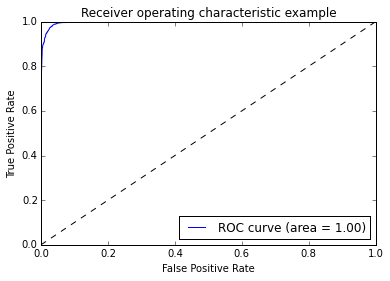

In [10]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [4]:
import cPickle

In [5]:
cPickle.loads("/home/patanjalichanakya/Documents/Galvanize/find_defaulter/data/0.pickle")

UnpicklingError: invalid load key, '/'.

In [17]:
with open("/home/patanjalichanakya/Documents/Galvanize/find_defaulter/data/2.pickle") as f:
    f_read = f.read()

In [18]:
cPickle.loads(f_read)

[0.99575057445937865, 0.99615453219595618, 0.99239824986622183]

In [19]:
x_test = model.X_test

In [20]:
y_test = model.y_test

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("/home/patanjalichanakya/Documents/Galvanize/find_defaulter/data/1638.csv")

In [5]:
df.columns

Index([u'Unnamed: 0', u'activity', u'basket_amount', u'country_code', u'description', u'description_lang', u'entries', u'funded_amount', u'funded_date', u'geo_level', u'lat', u'len_teg', u'lender_count', u'long', u'num_borrowers', u'partner_id', u'repayment_interval', u'repayment_term', u'sector', u'status', u'theme', u'town', u'num_male', u'num_female', u'male_ratio', u'number_of_picture', u'ratio_of_picture'], dtype='object')

In [1]:
from model_building import ModelBuilding

In [2]:
model = ModelBuilding()

In [3]:
model.run_models(["activity"])

/home/patanjalichanakya/anaconda/lib/python2.7/site-packages/sklearn/metrics/metrics.py:1771: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [4]:
print model.data_

        activity
0              0
1              1
2              2
3              3
4              1
5              4
6              5
7              6
8              6
9              7
10             1
11             8
12             3
13             1
14             9
15            10
16             1
17             1
18            11
19            12
20            13
21            14
22            12
23            15
24             5
25             5
26            16
27             1
28            17
29             4
...          ...
791363        33
791413       148
791434        32
791997        70
792404         2
792415        34
792441        34
792461         2
793758        22
794711         2
795034        14
795153       148
795293        41
795721       148
795764       148
795785       148
796787       148
797154        63
797257         1
797614       148
798079        34
798104        18
799711       148
799797        34
799847       148
800981       133
801286        

In [19]:
print model.c_matrix_classifier

[array([[185443,      0],
       [  5171,      0]]), array([[185443,      0],
       [  5171,      0]]), array([[185443,      0],
       [  5171,      0]])]


In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
rfmodel = RandomForestClassifier()

In [9]:
rfmodel.fit(model.X_train, model.y_train)

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0)

In [10]:
rfmodel.predict(model.X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [16]:
from sklearn.metrics import recall_score, precision_score, confusion_matrix

In [17]:
confusion_matrix(model.y_test, rfmodel.predict(model.X_test))

array([[185443,      0],
       [  5171,      0]])

In [22]:
model.tpr_all

[]

In [24]:
models=  [ "DecisionTreeClassifier", "RandomForestClassifier", "GradientBoostingClassifier"]

In [28]:
recall = [0.1, 0.8,0.9]

In [29]:
def best_model(recall):
        models=  [ "DecisionTreeClassifier", "RandomForestClassifier", "GradientBoostingClassifier"]
        position = -1
        value = -1
        for i,j in enumerate (recall):
            if value < j:
                value = j
                position = i
        return models[position]

In [30]:
best_model(recall)

'GradientBoostingClassifier'

In [31]:
model.X_test

array([[115],
       [ 14],
       [122],
       ..., 
       [ 17],
       [ 22],
       [ 33]])

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("../data/1638.csv")

In [4]:
df.columns

Index([u'Unnamed: 0', u'activity', u'basket_amount', u'country_code', u'description', u'description_lang', u'entries', u'funded_amount', u'funded_date', u'geo_level', u'lat', u'len_teg', u'lender_count', u'long', u'num_borrowers', u'partner_id', u'repayment_interval', u'repayment_term', u'sector', u'status', u'theme', u'town', u'num_male', u'num_female', u'male_ratio', u'number_of_picture', u'ratio_of_picture'], dtype='object')

In [7]:
groupbycountrycount = df.groupby('country_code').count()

In [8]:
groupbycountrycount


,Unnamed: 0,activity,basket_amount,description,description_lang,entries,funded_amount,funded_date,geo_level,lat,...,repayment_term,sector,status,theme,town,num_male,num_female,male_ratio,number_of_picture,ratio_of_picture
country_code,,,,,,,,,,,,,,,,,,,,,
0,30405,30405,30405,28351,30405,30405,30405,30405,30405,30405,...,30405,30405,30405,30405,30405,30405,30405,30405,30405,30405
1,11409,11409,11409,10337,11409,11409,11409,11409,11409,11409,...,11409,11409,11409,11409,11409,11409,11409,11409,11409,11409
2,70596,70596,70596,63755,70596,70596,70596,70596,70596,70596,...,70596,70596,70596,70596,70596,70596,70596,70596,70596,70596
3,8,8,8,0,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
4,296,296,296,289,296,296,296,296,296,296,...,296,296,296,296,296,296,296,296,296,296
5,9721,9721,9721,8775,9721,9721,9721,9721,9721,9721,...,9721,9721,9721,9721,9721,9721,9721,9721,9721,9721
6,34640,34640,34640,30612,34640,34640,34640,34640,34640,34640,...,34640,34640,34640,34640,34640,34640,34640,34640,34640,34640
7,10555,10555,10555,9827,10555,10555,10555,10555,10555,10555,...,10555,10555,10555,10555,10555,10555,10555,10555,10555,10555
8,20531,20531,20531,19211,20531,20531,20531,20531,20531,20531,...,20531,20531,20531,20531,20531,20531,20531,20531,20531,20531


In [9]:
groupbycountrymean = df.groupby("country_code").mean()

In [11]:
dfgroubycountry = groupbycountrymean[["lat","long"]]

In [12]:
dfgroubycountry["count"] = groupbycountrycount["Unnamed: 0"]

/home/patanjalichanakya/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [13]:
dfgroubycountry.head()

,lat,long,count
country_code,,,
0,1.252811,32.720761,30405
1,-6.378970,36.998398,11409
2,0.538568,37.440382,70596
3,31.500000,34.466667,8
4,42.810753,25.298889,296


In [15]:
dfgroubycountry.sort("count")

,lat,long,count
country_code,,,
85,20.000000,-12.000000,1
84,-6.000000,147.000000,1
82,-22.000000,24.000000,1
81,-22.000000,17.000000,1
73,16.000000,-24.000000,2
86,-16.000000,167.000000,4
78,13.083333,-61.200000,4
77,-8.000000,159.000000,5
83,9.000000,-80.000000,7


In [16]:
import cPickle

In [17]:
with open("../data/country_code_list_1638.pickle") as f:
    f_read = f.read()
list_ = cPickle.loads(f_read)

In [26]:
dfgroubycountry.to_csv("../data/country_count_loan.csv")

In [21]:
dfgroubycountry["country_name"] = dfgroubycountry.index

/home/patanjalichanakya/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [23]:
dfgroubycountry["country_name"] = dfgroubycountry["country_name"].apply(lambda x :list_[x])

/home/patanjalichanakya/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [24]:
dfgroubycountry

,lat,long,count,country_name
country_code,,,,
0,1.252811,32.720761,30405,UG
1,-6.378970,36.998398,11409,TZ
2,0.538568,37.440382,70596,KE
3,31.500000,34.466667,8,GZ
4,42.810753,25.298889,296,BG
5,14.081027,-14.543228,9721,SN
6,12.459107,-86.106317,34640,NI
7,14.358617,-86.833782,10555,HN
8,-2.008272,-77.638540,20531,EC


In [ ]:
gor